# Assignment 3.1: Impacting the Business with a Distributed Data Science Pipeline (Part 2)

# 1. Using the data you identified in the previous module, ingest the data into AWS S3 so that you can access it via SageMaker Studio. You may manually upload to an S3 bucket.
This was done maually and put into the following S3 bucket "s3://sagemaker-us-east-1-508233972396/Instacart-data"

# 2. Once you have manually uploaded your data, you will need to implement a Sagemaker Studio Notebook to copy the data to the Sagemaker S3 bucket, and then to the local SageMaker Instance.
This is done below.

In [155]:
# List all the source files in my S3 Bucket
!aws s3 ls s3://sagemaker-us-east-1-508233972396/Instacart-data/

                           PRE csv/
2022-03-20 21:37:12          0 
2022-03-20 21:42:41       2603 aisles.csv
2022-03-20 21:42:41        270 departments.csv
2022-03-20 21:42:38  577550706 order_products__prior.csv
2022-03-20 21:42:38   24680147 order_products__train.csv
2022-03-20 21:42:38  108968645 orders.csv
2022-03-20 21:42:40    2166953 products.csv
2022-03-20 21:42:39    1475693 sample_submission.csv


In [158]:
# List all the source files in my S3 Bucket
!aws s3 ls s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/

In [11]:
# Load necessary libraries and Account IDs
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

# Set S3 Source Location

In [316]:
s3_public_path_csv = "s3://sagemaker-us-east-1-508233972396/Instacart-data"

In [317]:
%store s3_public_path_csv

Stored 's3_public_path_csv' (str)


In [318]:
bucket

'sagemaker-us-east-1-508233972396'

# Set S3 Destination Location & Copy Data From the Source S3 Bucket to our Destination S3 Bucket in this Account

In [321]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/departments".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "departments.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/departments
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/departments.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/departments/departments.csv


In [322]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/aisles".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "aisles.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/aisles
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/aisles.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/aisles/aisles.csv


In [323]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/products".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "products.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/products
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/products.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/products/products.csv


In [324]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/sample_submission".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "sample_submission.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/sample_submission
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/sample_submission.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/sample_submission/sample_submission.csv


In [325]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/orders".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "orders.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/orders
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/orders.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/orders/orders.csv


In [326]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/order_products__train".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "order_products__train.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__train
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/order_products__train.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__train/order_products__train.csv


In [327]:
s3_private_path_csv = "s3://{}/Instacart-data/csv/order_products__prior".format(bucket)
print(s3_private_path_csv)
!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "order_products__prior.csv"

s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__prior
copy: s3://sagemaker-us-east-1-508233972396/Instacart-data/order_products__prior.csv to s3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__prior/order_products__prior.csv


In [328]:
# List the files in our destination bucket.
!aws s3 ls $s3_private_path_csv/

2022-03-21 04:48:56  577550706 order_products__prior.csv


## Create an Athena Database to help with data exploration

In [413]:
# libraries and IDs

import boto3
import sagemaker


sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

from pyathena import connect

In [414]:
database_name = "insta_db"

In [415]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [416]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [417]:
statement = """DROP SCHEMA IF EXISTS {} CASCADE""".format(database_name)
print(statement)
# Execute the sql above.
import pandas as pd

pd.read_sql(statement, conn)

DROP SCHEMA IF EXISTS insta_db CASCADE


""


In [418]:
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement)

CREATE DATABASE IF NOT EXISTS insta_db


In [419]:
# Execute the sql above.
import pandas as pd

pd.read_sql(statement, conn)

""


In [420]:
# Execute the sql to Verify database was created.
statement = "SHOW DATABASES"

df_show = pd.read_sql(statement, conn)
df_show.head(5)

,database_name
0,default
1,dsoaws
2,insta_db


In [421]:
# Verify there are no tables.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name


## Ingest Products Table
#### products

This file contains the names of the products with their corresponding product_id. Furthermore the aisle and deparment are included.


In [422]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "products"
s3_private_path_csv = "s3://{}/Instacart-data/csv/products".format(bucket)

In [423]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [424]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [425]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         product_id bigint,
         product_name string,
         aisle_id int,
         department_id int

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.products(
         product_id bigint,
         product_name string,
         aisle_id int,
         department_id int

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/products'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [426]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [427]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,products


In [428]:
product_category = "Chocolate Sandwich Cookies"

statement = """SELECT * FROM {}.{}
    WHERE product_name = '{}' LIMIT 100""".format(
    database_name, table_name_csv, product_category
)

print(statement)

SELECT * FROM insta_db.products
    WHERE product_name = 'Chocolate Sandwich Cookies' LIMIT 100


In [429]:
df = pd.read_sql(statement, conn)
df.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


## Ingest aisles table
#### aisles

This file contains the different aisles.

In [430]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "aisles"
s3_private_path_csv = "s3://{}/Instacart-data/csv/aisles".format(bucket)

In [431]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [432]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [433]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         aisle_id int,
         aisle string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.aisles(
         aisle_id int,
         aisle string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/aisles'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [434]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [435]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,products


In [436]:
product_category = "coffee"

statement = """SELECT * FROM {}.{}
    WHERE aisle = '{}' LIMIT 100""".format(
    database_name, table_name_csv, product_category
)

print(statement)

SELECT * FROM insta_db.aisles
    WHERE aisle = 'coffee' LIMIT 100


In [437]:
df = pd.read_sql(statement, conn)
df.head(5)

,aisle_id,aisle
0,26,coffee


## Ingest departments table
#### departments


In [438]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "departments"
s3_private_path_csv = "s3://{}/Instacart-data/csv/departments".format(bucket)

In [439]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [440]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [441]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         department_id int,
         department string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.departments(
         department_id int,
         department string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/departments'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [442]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [443]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,departments
2,products


In [444]:
product_category = "frozen"

statement = """SELECT * FROM {}.{}
    WHERE department = '{}' LIMIT 100""".format(
    database_name, table_name_csv, product_category
)

print(statement)

SELECT * FROM insta_db.departments
    WHERE department = 'frozen' LIMIT 100


In [445]:
df = pd.read_sql(statement, conn)
df.head(5)

,department_id,department
0,1,frozen


## Ingest order_products__train table
#### order_products_train

This file gives us information about which products (product_id) were ordered. It also contains information of the order (add_to_cart_order) in which the products were put into the cart and information of whether this product is a re-order(1) or not(0).

For example, we see below that order_id 1 had 8 products, 4 of which are reorders.

Still we don't know what these products are. This information is in the products.csv

In [446]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "order_products__train"
s3_private_path_csv = "s3://{}/Instacart-data/csv/order_products__train".format(bucket)

In [447]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [448]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [449]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [450]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         order_id bigint,
         product_id bigint,
         add_to_cart_order bigint,
         reordered bigint

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv , s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.order_products__train(
         order_id bigint,
         product_id bigint,
         add_to_cart_order bigint,
         reordered bigint

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__train'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [452]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [453]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,departments
2,order_products__train
3,products


In [454]:
statement = """SELECT * FROM {}.{} LIMIT 5""".format(
    database_name, table_name_csv
)

print(statement)

SELECT * FROM insta_db.order_products__train LIMIT 5


In [455]:
df = pd.read_sql(statement, conn)
df.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Ingest sample_submission table

I don't think this data is necessary for our task. I think it is meant to be an example of the Kaggle delieverable.  Which is not what we want to do or achieve with this project.

In [456]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "sample_submission"
s3_private_path_csv = "s3://{}/Instacart-data/csv/sample_submission".format(bucket)

In [457]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [458]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [459]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         order_id bigint,
         products string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.sample_submission(
         order_id bigint,
         products string

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/sample_submission'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [460]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [461]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,departments
2,order_products__train
3,products
4,sample_submission


In [462]:
statement = """SELECT * FROM {}.{} LIMIT 5""".format(
    database_name, table_name_csv
)

print(statement)

SELECT * FROM insta_db.sample_submission LIMIT 5


In [463]:
df = pd.read_sql(statement, conn)
df.head(5)

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


## Ingest order_products_prior table
#### order_products_prior

This file is structurally the same as the other_products_train.csv. 


In [464]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "order_products_prior"
s3_private_path_csv = "s3://{}/Instacart-data/csv/order_products__prior".format(bucket)

In [465]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [466]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [467]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         order_id bigint,
         product_id bigint,
         add_to_cart_order int,
         reordered int

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.order_products_prior(
         order_id bigint,
         product_id bigint,
         add_to_cart_order int,
         reordered int

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/order_products__prior'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [468]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [469]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,departments
2,order_products__train
3,order_products_prior
4,products
5,sample_submission


In [470]:
statement = """SELECT * FROM {}.{} LIMIT 5""".format(
    database_name, table_name_csv
)

print(statement)

SELECT * FROM insta_db.order_products_prior LIMIT 5


In [471]:
df = pd.read_sql(statement, conn)
df.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2988749,15485,10,1
1,2988750,4595,1,1
2,2988750,37417,2,0
3,2988750,49605,3,0
4,2988750,8214,4,0


## Ingest orders table
#### orders

This file gives a list of all orders we have in the dataset. 1 row per order. 
For example, we can see that user 1 has 11 orders, 1 of which is in the train set, and 10 of which are prior orders. The orders.csv doesn't tell us about which products were ordered. This is contained in the order_products.csv


In [472]:
# Set Athena parameters
database_name = "insta_db"
table_name_csv = "orders"
s3_private_path_csv = "s3://{}/Instacart-data/csv/orders".format(bucket)

In [473]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [474]:
# Execute SQL Above
import pandas as pd

statement = """DROP TABLE IF EXISTS {}.{}""".format(
    database_name, table_name_csv
)

pd.read_sql(statement, conn)

""


In [475]:
# SQL statement to execute
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         order_id bigint,
         user_id bigint,
         eval_set string,
         order_number int,
         order_dow int,
         order_hour_of_day int,
         days_since_prior_order decimal(15)

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\\n' LOCATION '{}'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')""".format(
    database_name, table_name_csv, s3_private_path_csv
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS insta_db.orders(
         order_id bigint,
         user_id bigint,
         eval_set string,
         order_number int,
         order_dow int,
         order_hour_of_day int,
         days_since_prior_order decimal(15)

) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' LOCATION 's3://sagemaker-us-east-1-508233972396/Instacart-data/csv/orders'
TBLPROPERTIES ('compressionType'='gzip', 'skip.header.line.count'='1')


In [476]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

""


In [477]:
# Verify the table was created.

statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(7)

,tab_name
0,aisles
1,departments
2,order_products__train
3,order_products_prior
4,orders
5,products
6,sample_submission


In [478]:
statement = """SELECT * FROM {}.{} LIMIT 5""".format(
    database_name, table_name_csv
)

print(statement)

SELECT * FROM insta_db.orders LIMIT 5


In [479]:
# Execute SQL Above
import pandas as pd

pd.read_sql(statement, conn)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2140650,64753,prior,14,4,20,3.0
1,1214639,64753,prior,15,1,14,4.0
2,217815,64753,prior,16,3,9,9.0
3,1704690,64753,prior,17,1,16,5.0
4,663202,64753,prior,18,3,13,2.0


# 2. Once the data is accessible, implement code within SageMaker Studio notebooks to explore the data and identify key fields, data types, areas of opportunity and possible bias.

In [144]:
import boto3
import sagemaker

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
# Set Seaborn Paramaters
sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 20,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "font.size": 10,
        "ytick.labelsize": 10,
    }
)

In [33]:
# Helper Code to Display Values on Bars
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()), 2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)

In [9]:

from pyathena import connect

In [12]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [13]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

### When do people order?
Let's have a look when people buy groceries online. 

#### Hour of Day
There is a clear effect of hour of day on order volume. Most orders are between 8.00-18.00

In [26]:
# Set Athena parameters
database_name = "insta_db"
table_name = "orders"

# SQL statement
statement = """
SELECT order_hour_of_day, count(*) as counts
FROM {}.{} 
group by 1
order by 1 ASC
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,order_hour_of_day,counts
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527


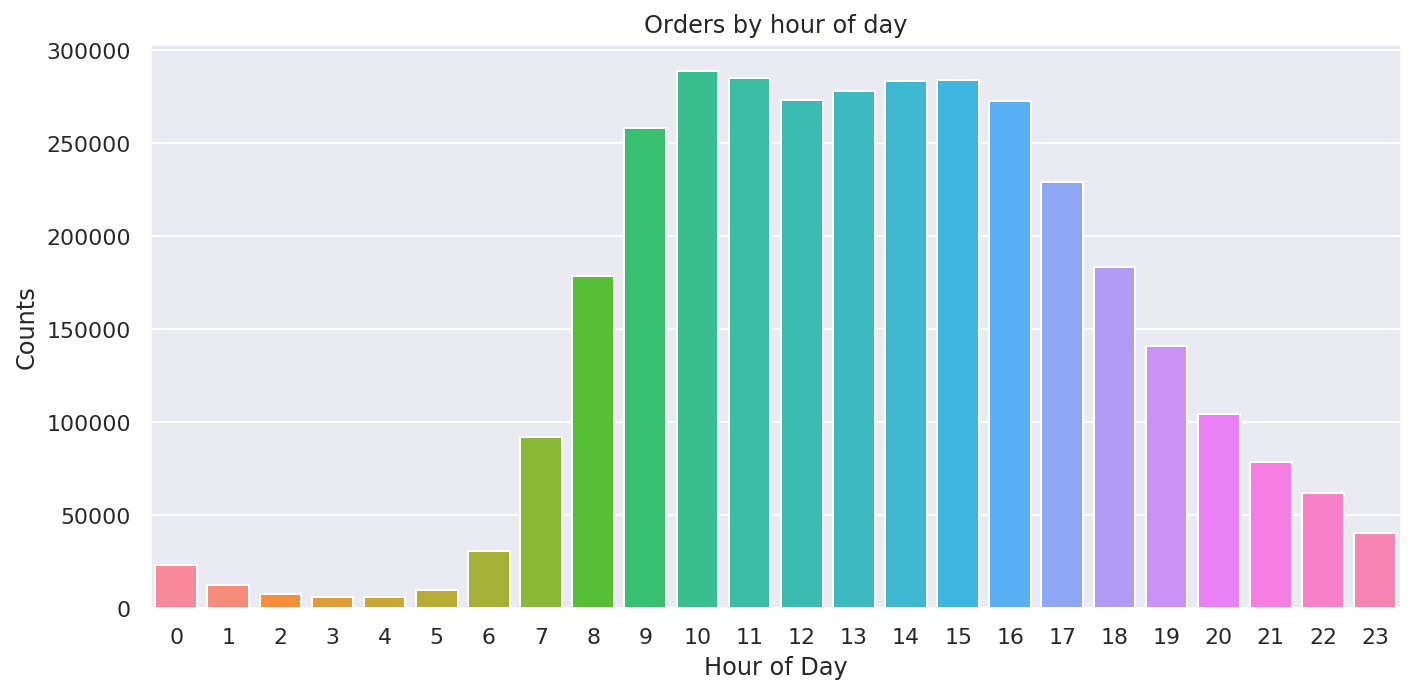

In [35]:
# Create plot
barplot = sns.barplot(y="counts", x="order_hour_of_day", data=df, saturation=1)

sns.set(rc={"figure.figsize": (10.0, 5.0)})

# Set title and x-axis ticks
plt.title("Orders by hour of day")
# plt.xticks([1, 2, 3, 4, 5], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Hour of Day")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

#### Day of Week
There is a clear effect of day of the week. Most orders are on days 0 and 1. Unfortunately there is no 
info regarding which values represent which day, but one would assume that this is the weekend.


In [37]:
# Set Athena parameters
database_name = "insta_db"
table_name = "orders"

# SQL statement
statement = """
SELECT order_dow, count(*) as counts
FROM {}.{} 
group by 1
order by 1 asc
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,order_dow,counts
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339


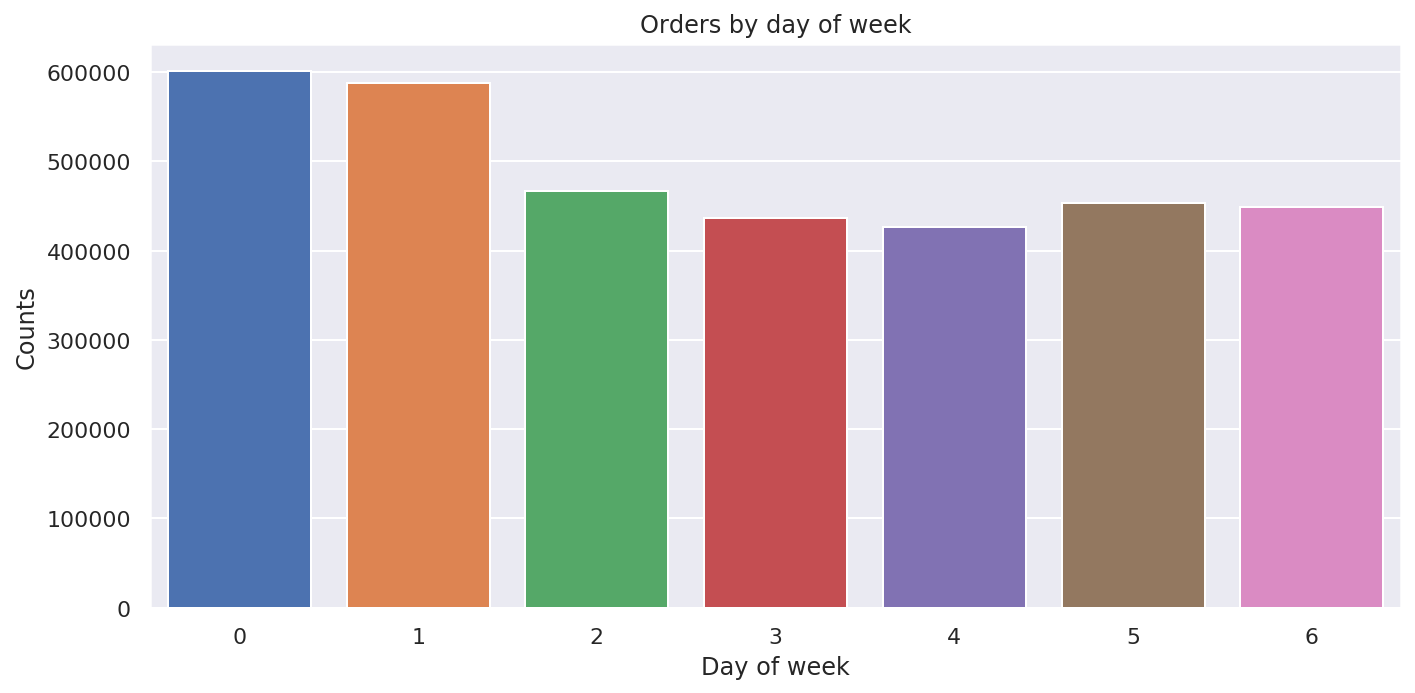

In [38]:
# Create plot
barplot = sns.barplot(y="counts", x="order_dow", data=df, saturation=1)

sns.set(rc={"figure.figsize": (10.0, 5.0)})

# Set title and x-axis ticks
plt.title("Orders by day of week")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Day of week")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

### When do they order again?
People seem to order more often after exactly 1 week. 

In [39]:
# Set Athena parameters
database_name = "insta_db"
table_name = "orders"

# SQL statement
statement = """
SELECT days_since_prior_order, count(*) as counts
FROM {}.{} 
group by 1
order by 1 asc
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,days_since_prior_order,counts
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696


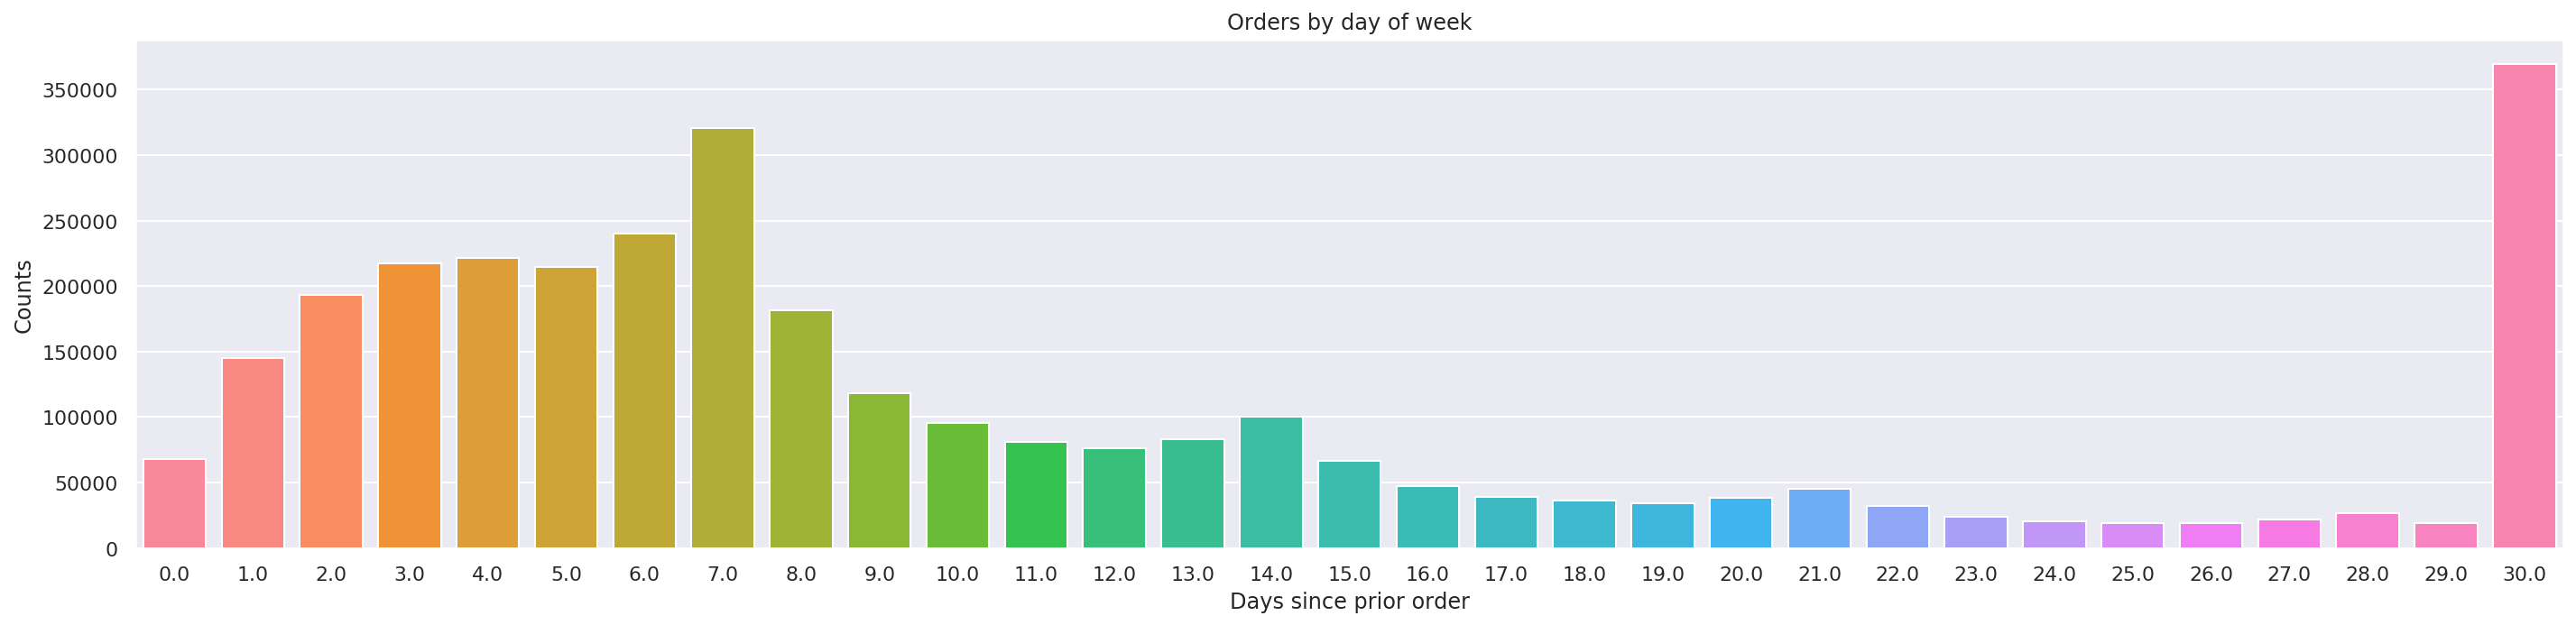

In [42]:
# Create plot
barplot = sns.barplot(y="counts", x="days_since_prior_order", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Days since prior Order")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Days since prior order")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

### How many prior orders are there?
We can see that there are always at least 3 prior orders. 

In [ ]:
orders %>% 
ilter(eval_set=="prior") %>% count(order_number) %>% ggplot(aes(order_number,n)) + geom_line(color="red", size=1)+geom_point(size=2, color="red")


In [46]:
# Set Athena parameters
database_name = "insta_db"
table_name = "orders"

# SQL statement
statement = """
SELECT order_number, count(*) as counts
FROM {}.{} 
where eval_set in('prior')
group by 1
order by 1 asc
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,order_number,counts
0,1,206209
1,2,206209
2,3,206209
3,4,182223
4,5,162633


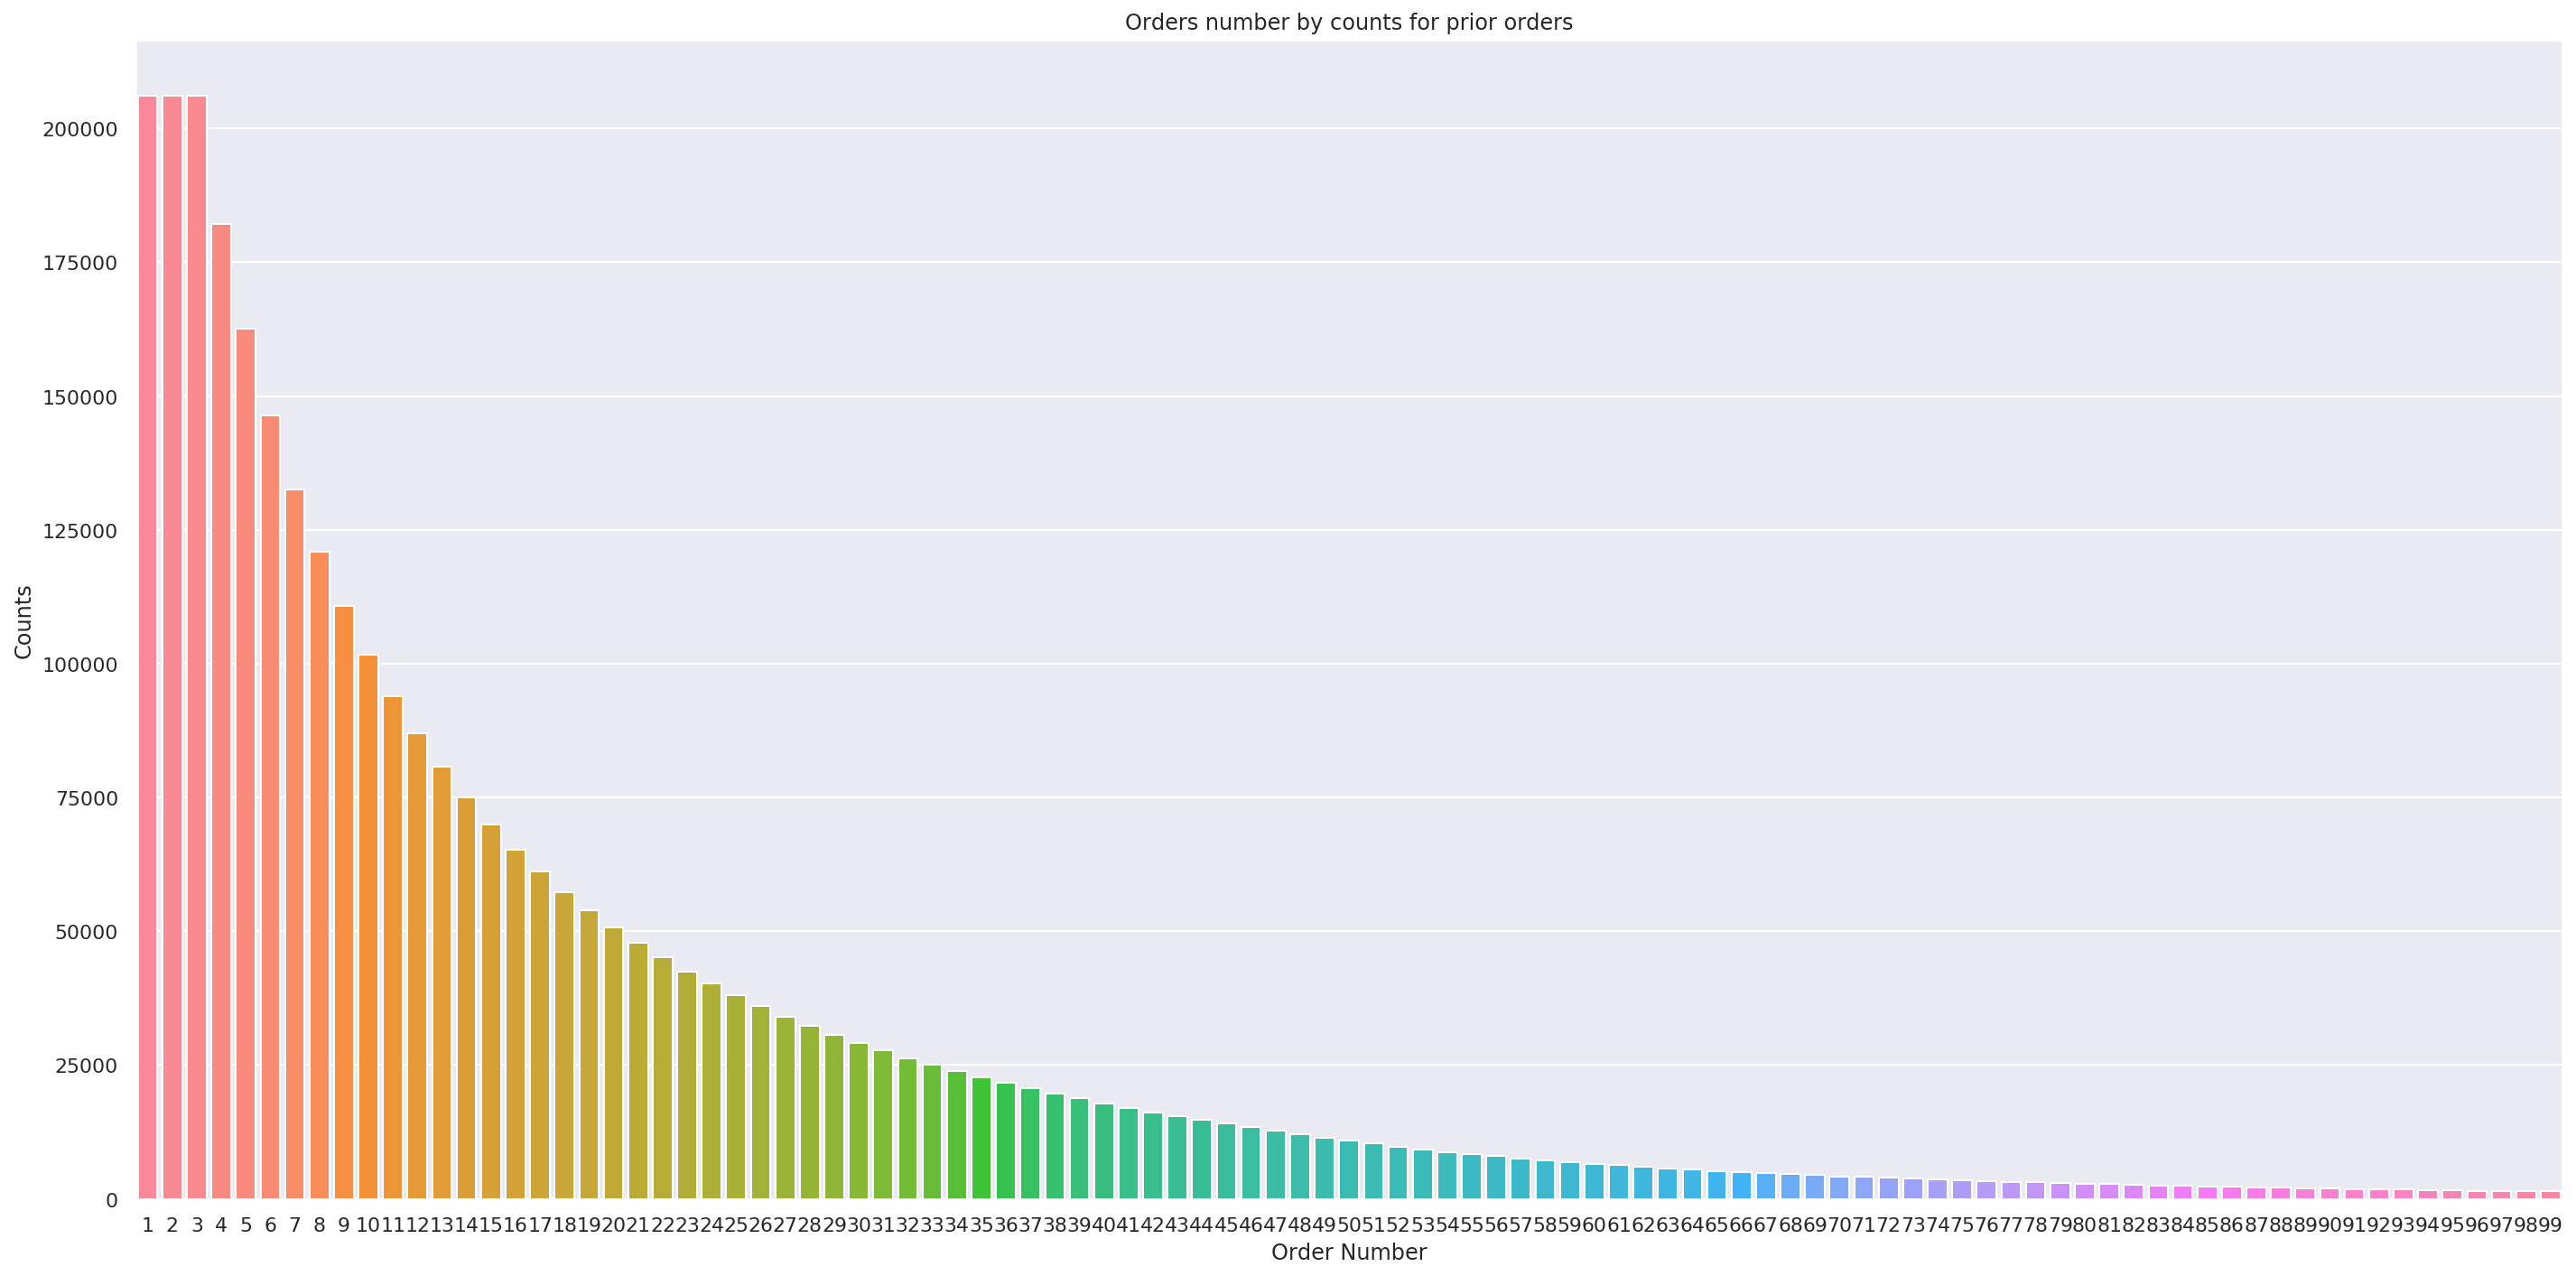

In [47]:
# Create plot
barplot = sns.barplot(y="counts", x="order_number", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Orders number by counts for prior orders")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Order Number")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

### Bestsellers
Let's have a look which products are sold most often (top10). And the clear winner is:
**Bananas**

In [57]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select t.product_id, 
counts,
a.product_name
from (SELECT product_id, count(*) as counts
FROM {}.{} 
group by product_id) t
left join insta_db.products a
on t.product_id = a.product_id
order by counts DESC limit 10
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,product_id,counts,product_name
0,24852,18726,Banana
1,13176,15480,Bag of Organic Bananas
2,21137,10894,Organic Strawberries
3,21903,9784,Organic Baby Spinach
4,47626,8135,Large Lemon


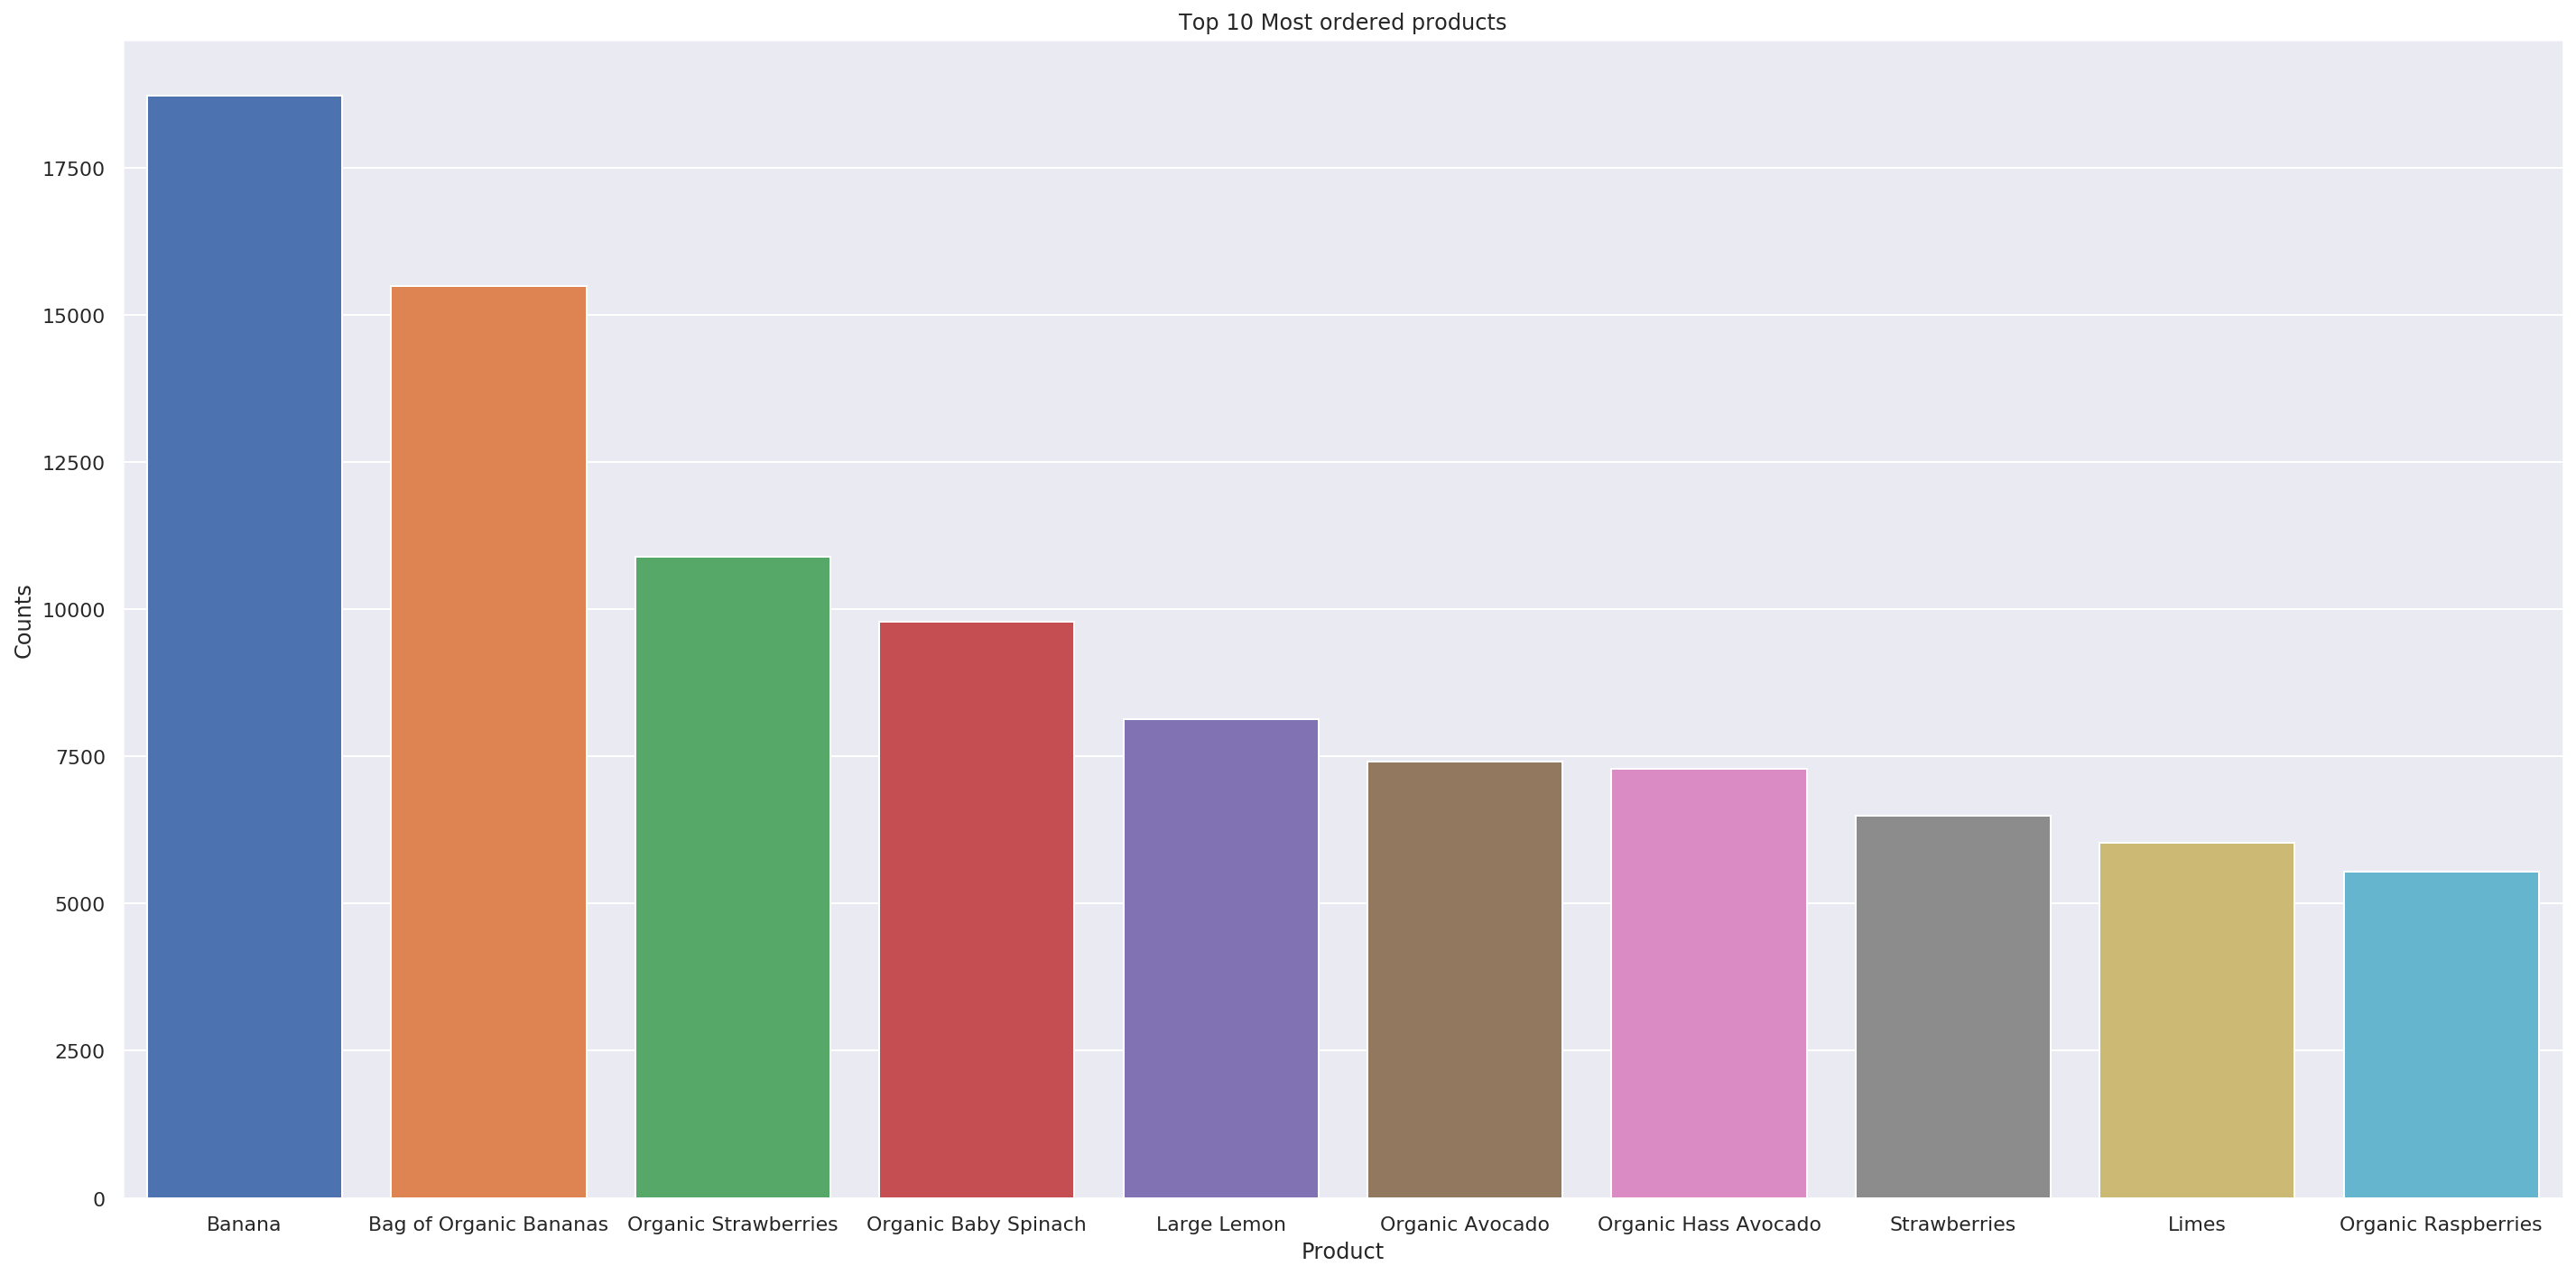

In [58]:
# Create plot
barplot = sns.barplot(y="counts", x="product_name", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Top 10 Most ordered products")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Product")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## How many items do people buy?
Let’s have a look how many items are in the orders. We can see that people most often order around 5 items. The distributions are comparable between the train and prior order set.

In [63]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select order_size, count(*) as counts
from (
SELECT order_id , max(add_to_cart_order) as order_size
FROM {}.{} 
group by order_id) t
group by order_size
order by order_size ASC
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,order_size,counts
0,1,6845
1,2,7368
2,3,8033
3,4,8218
4,5,8895


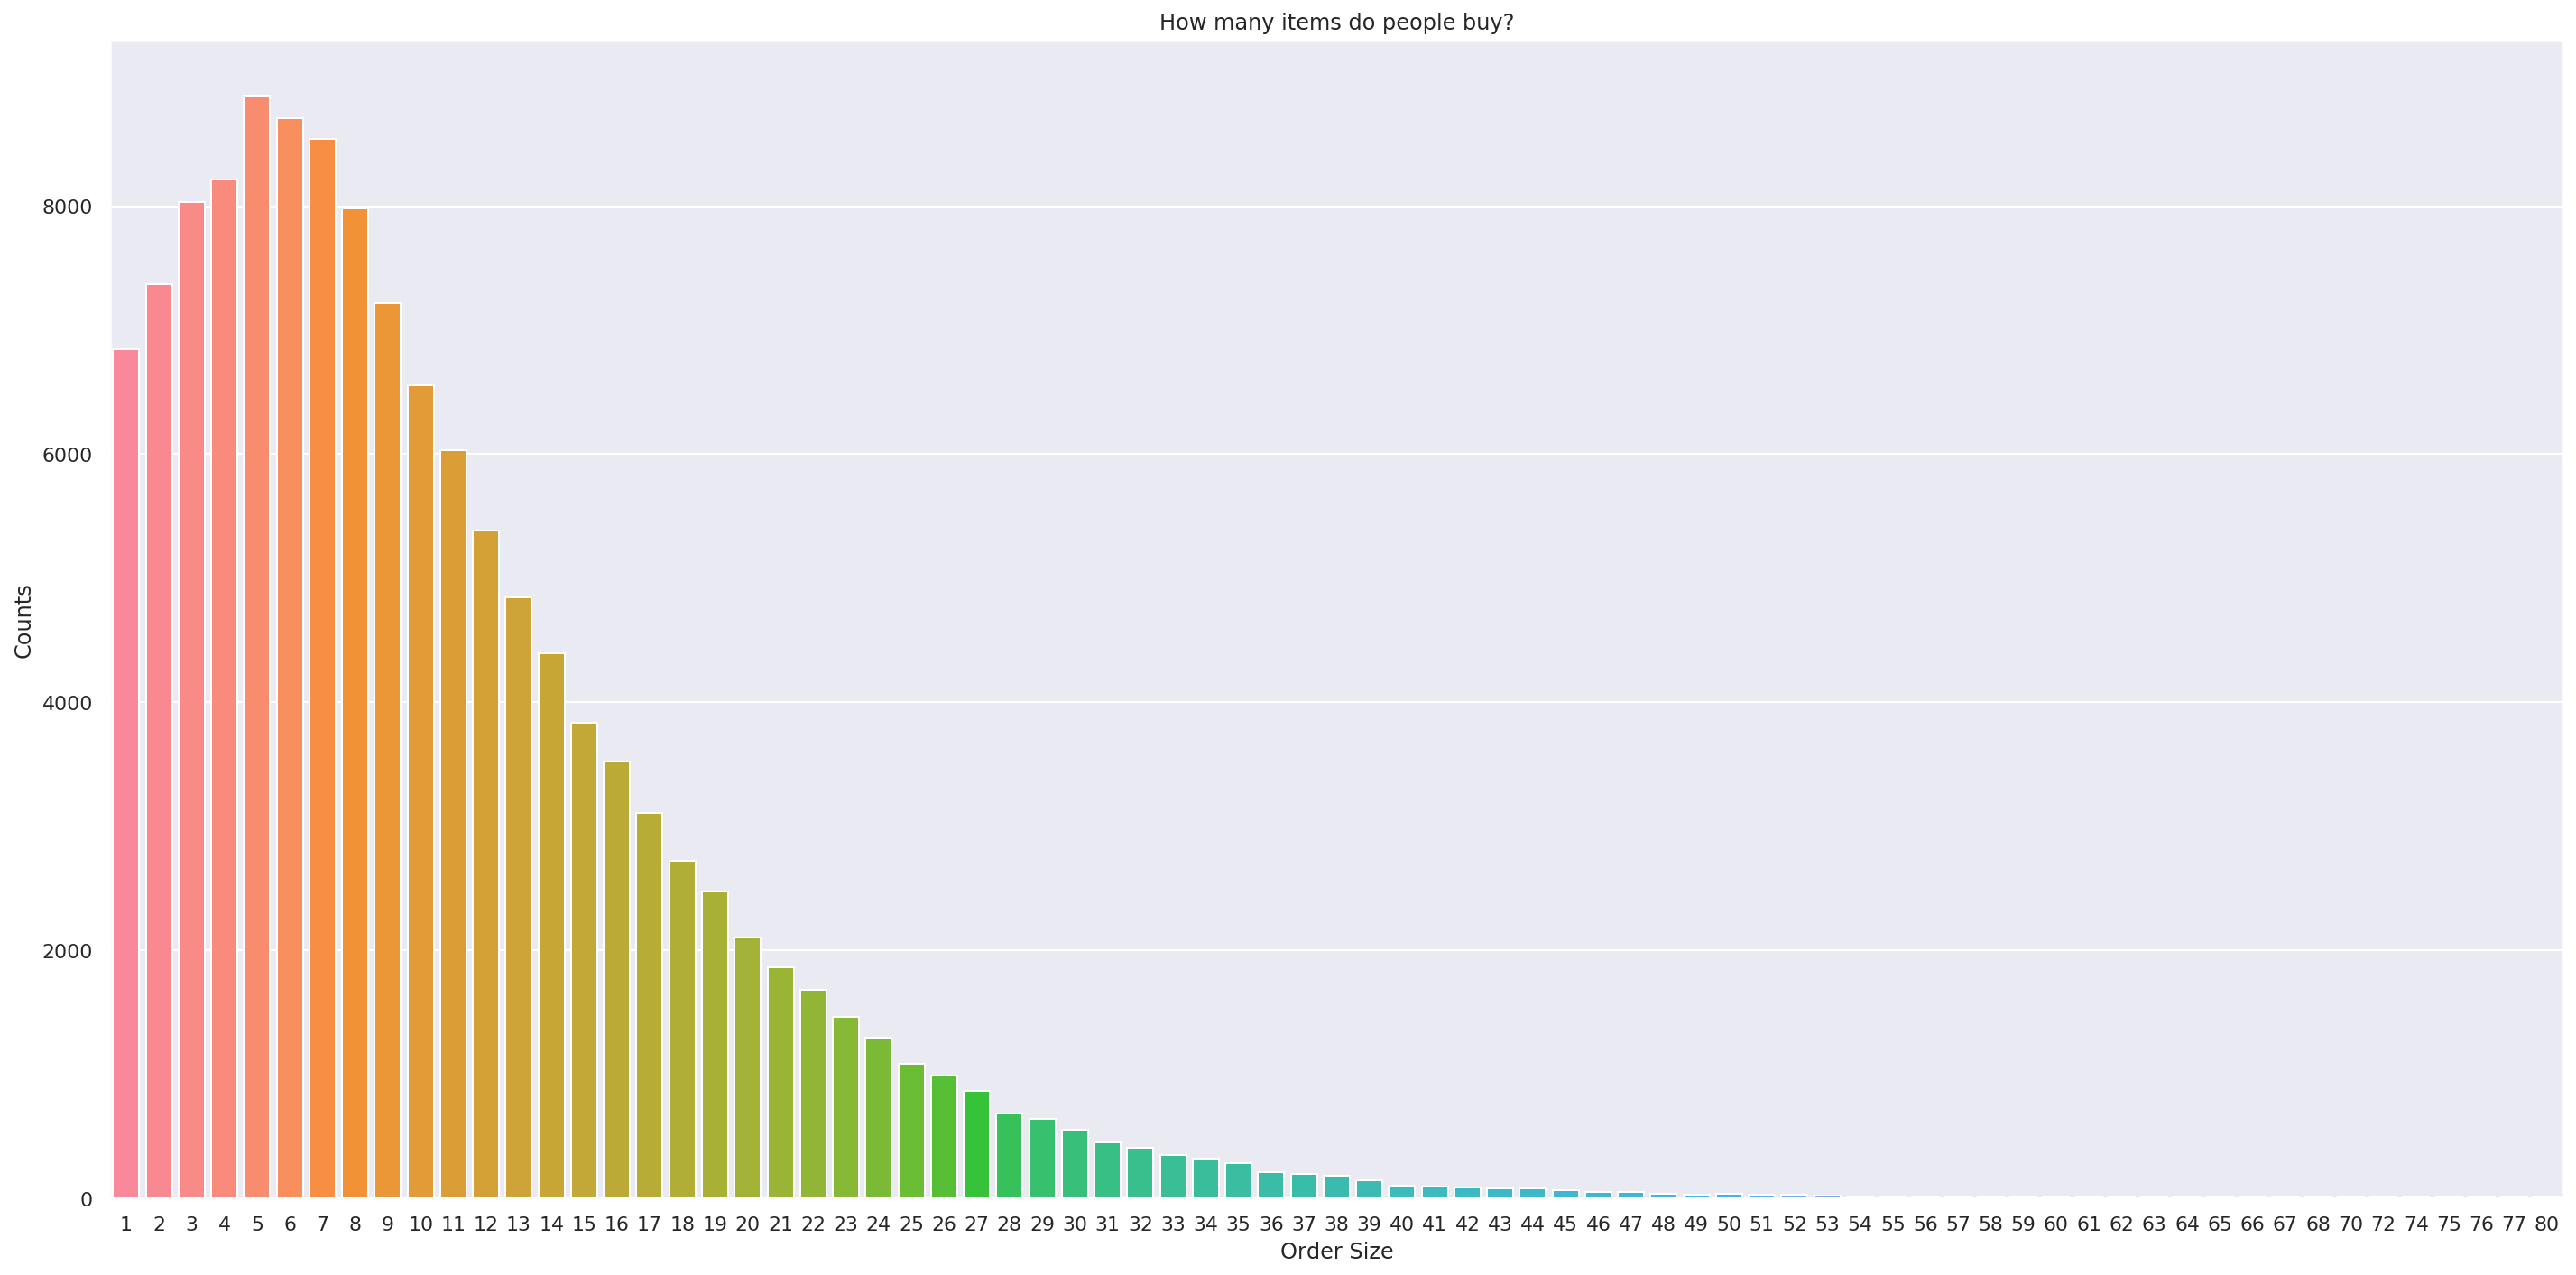

In [64]:
# Create plot
barplot = sns.barplot(y="counts", x="order_size", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("How many items do people buy?")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Order Size")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## How often do people order the same items again?
59% of the ordered items are reorders

In [77]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
SELECT reordered , count
, (count / cast(sum(count) over () as double))   as proportion
from (
SELECT reordered , count(*) as count
FROM {}.{} 
group by reordered
order by reordered ASC
)
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,reordered,count,proportion
0,0,555793,0.401406
1,1,828824,0.598594


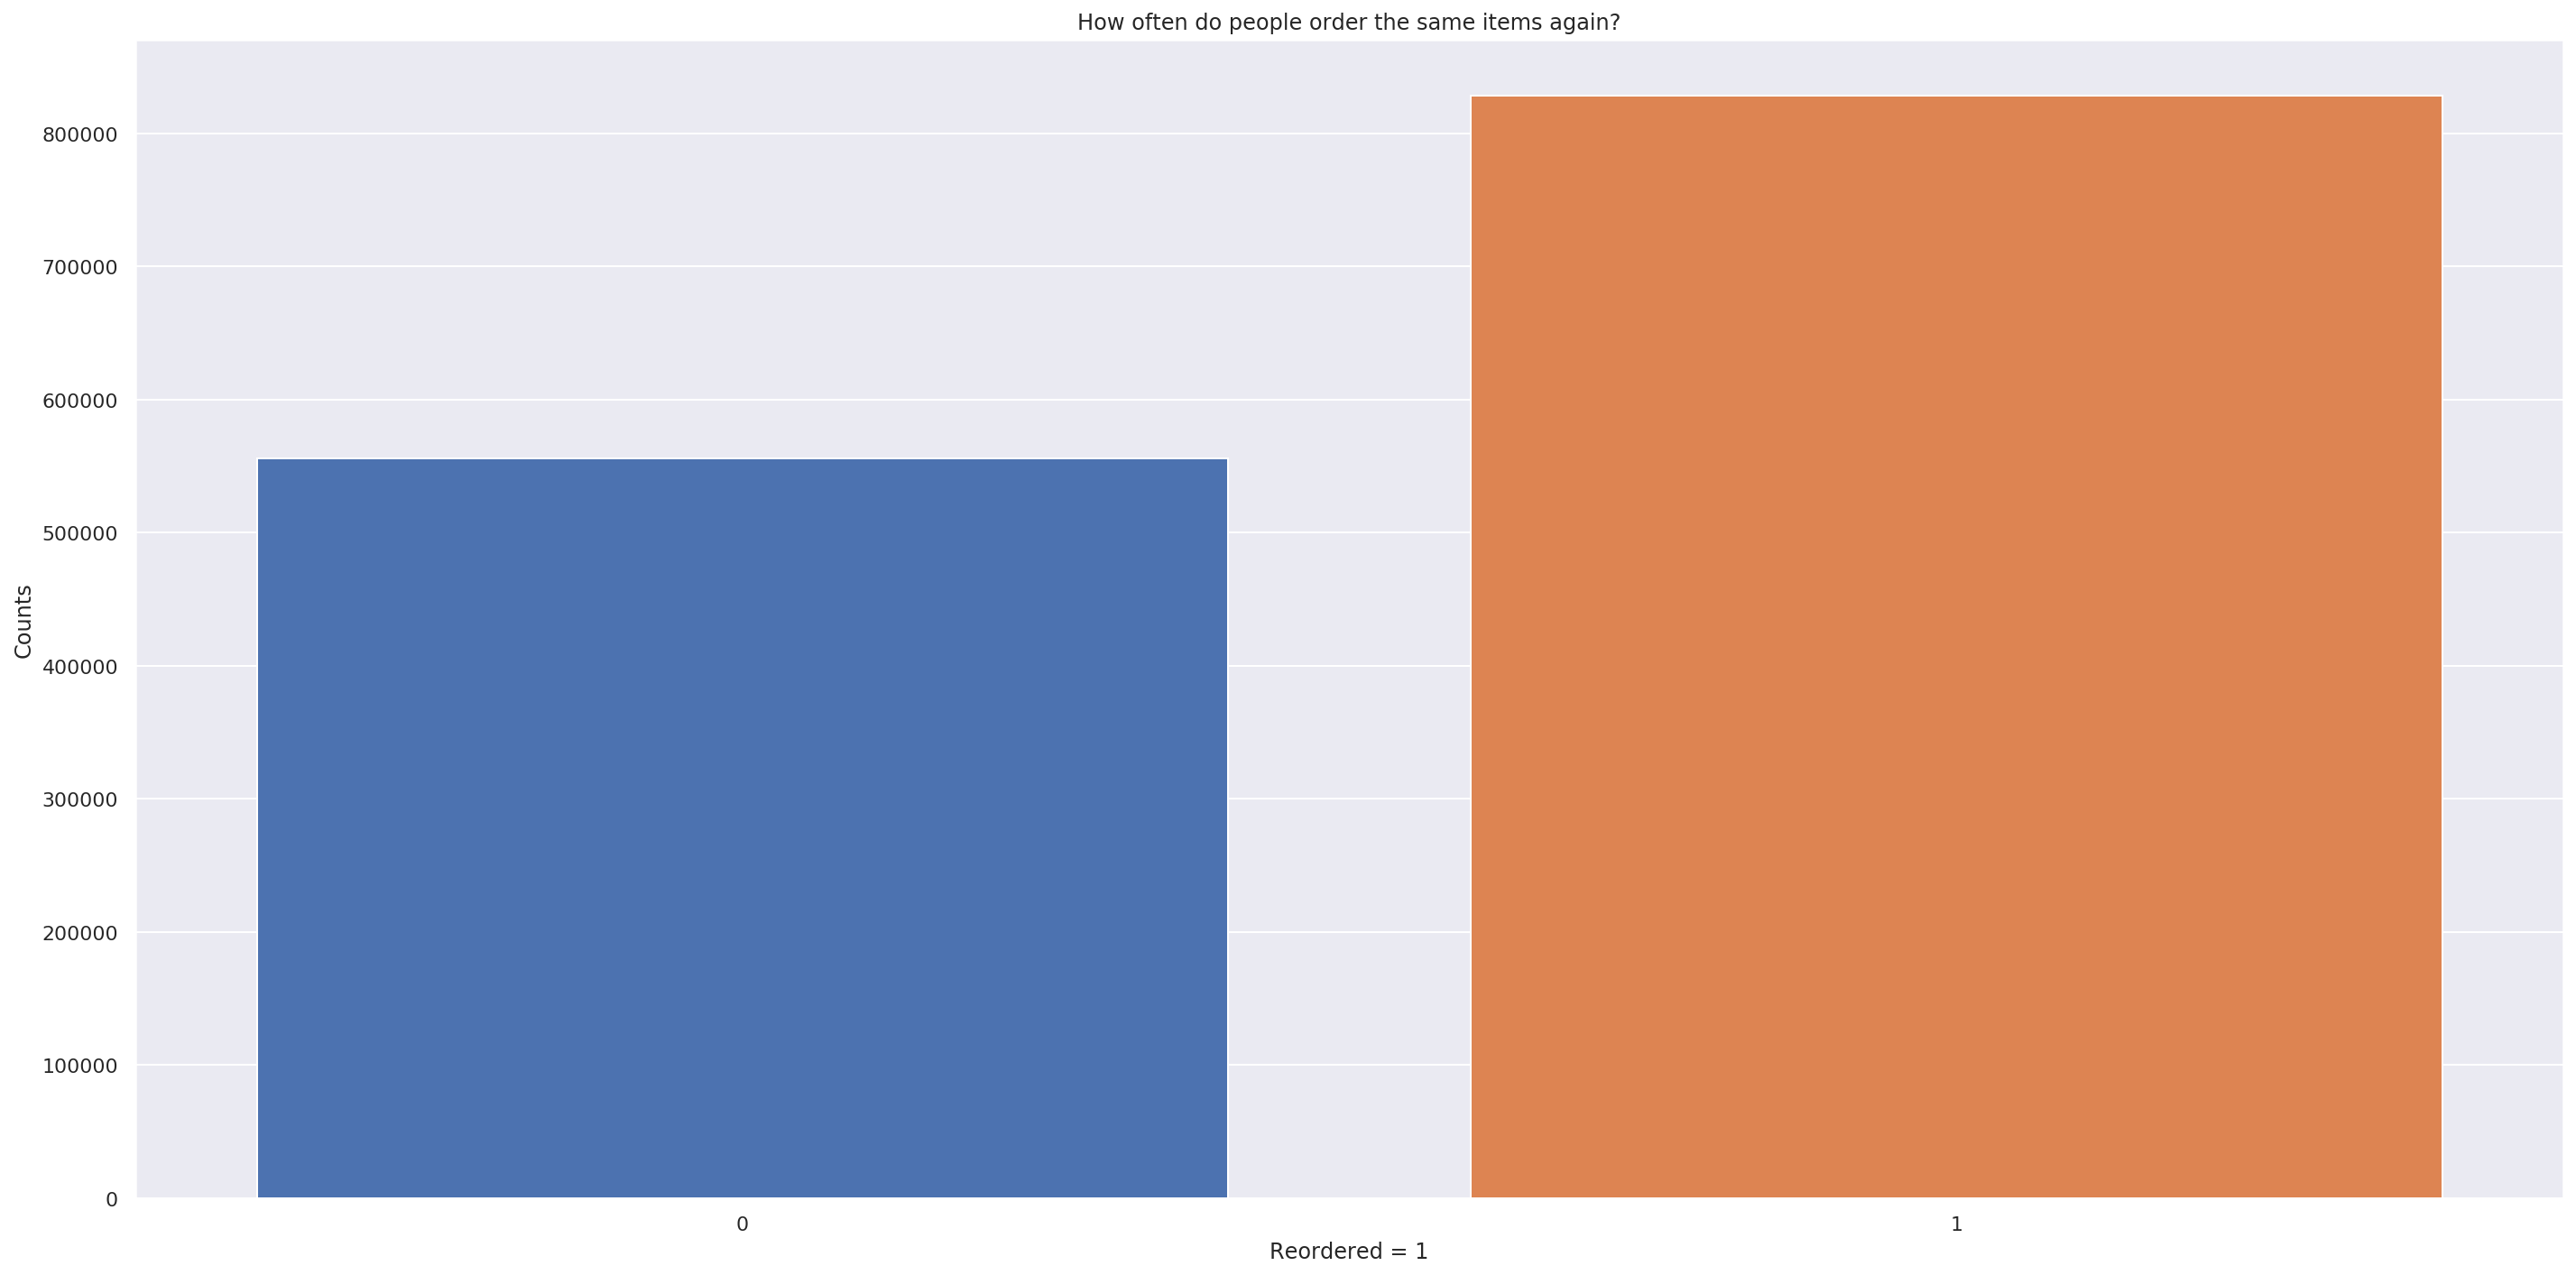

In [79]:
# Create plot
barplot = sns.barplot(y="count", x="reordered", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("How often do people order the same items again?")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Reordered = 1")
plt.ylabel("Counts")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## Most often reordered
Now here it becomes really interesting. These 10 products have the highest probability of being reordered.

In [85]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select t.*, a.*
from (
SELECT product_id 
, count(*) as count
, avg(reordered) as proportion_reordered 
FROM {}.{} 
group by product_id
) t
left join insta_db.products a
on t.product_id = a.product_id
where count > 40
order by proportion_reordered DESC limit 10
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,product_id,count,proportion_reordered,product_id,product_name,aisle_id,department_id
0,1729,92,0.934783,1729,2% Lactose Free Milk,84,16
1,20940,368,0.913043,20940,Organic Low Fat Milk,84,16
2,12193,59,0.898305,12193,100% Florida Orange Juice,98,7
3,31764,45,0.888889,31764,Original Sparkling Seltzer Water Cans,115,7
4,21038,81,0.888889,21038,Organic Spelt Tortillas,128,3


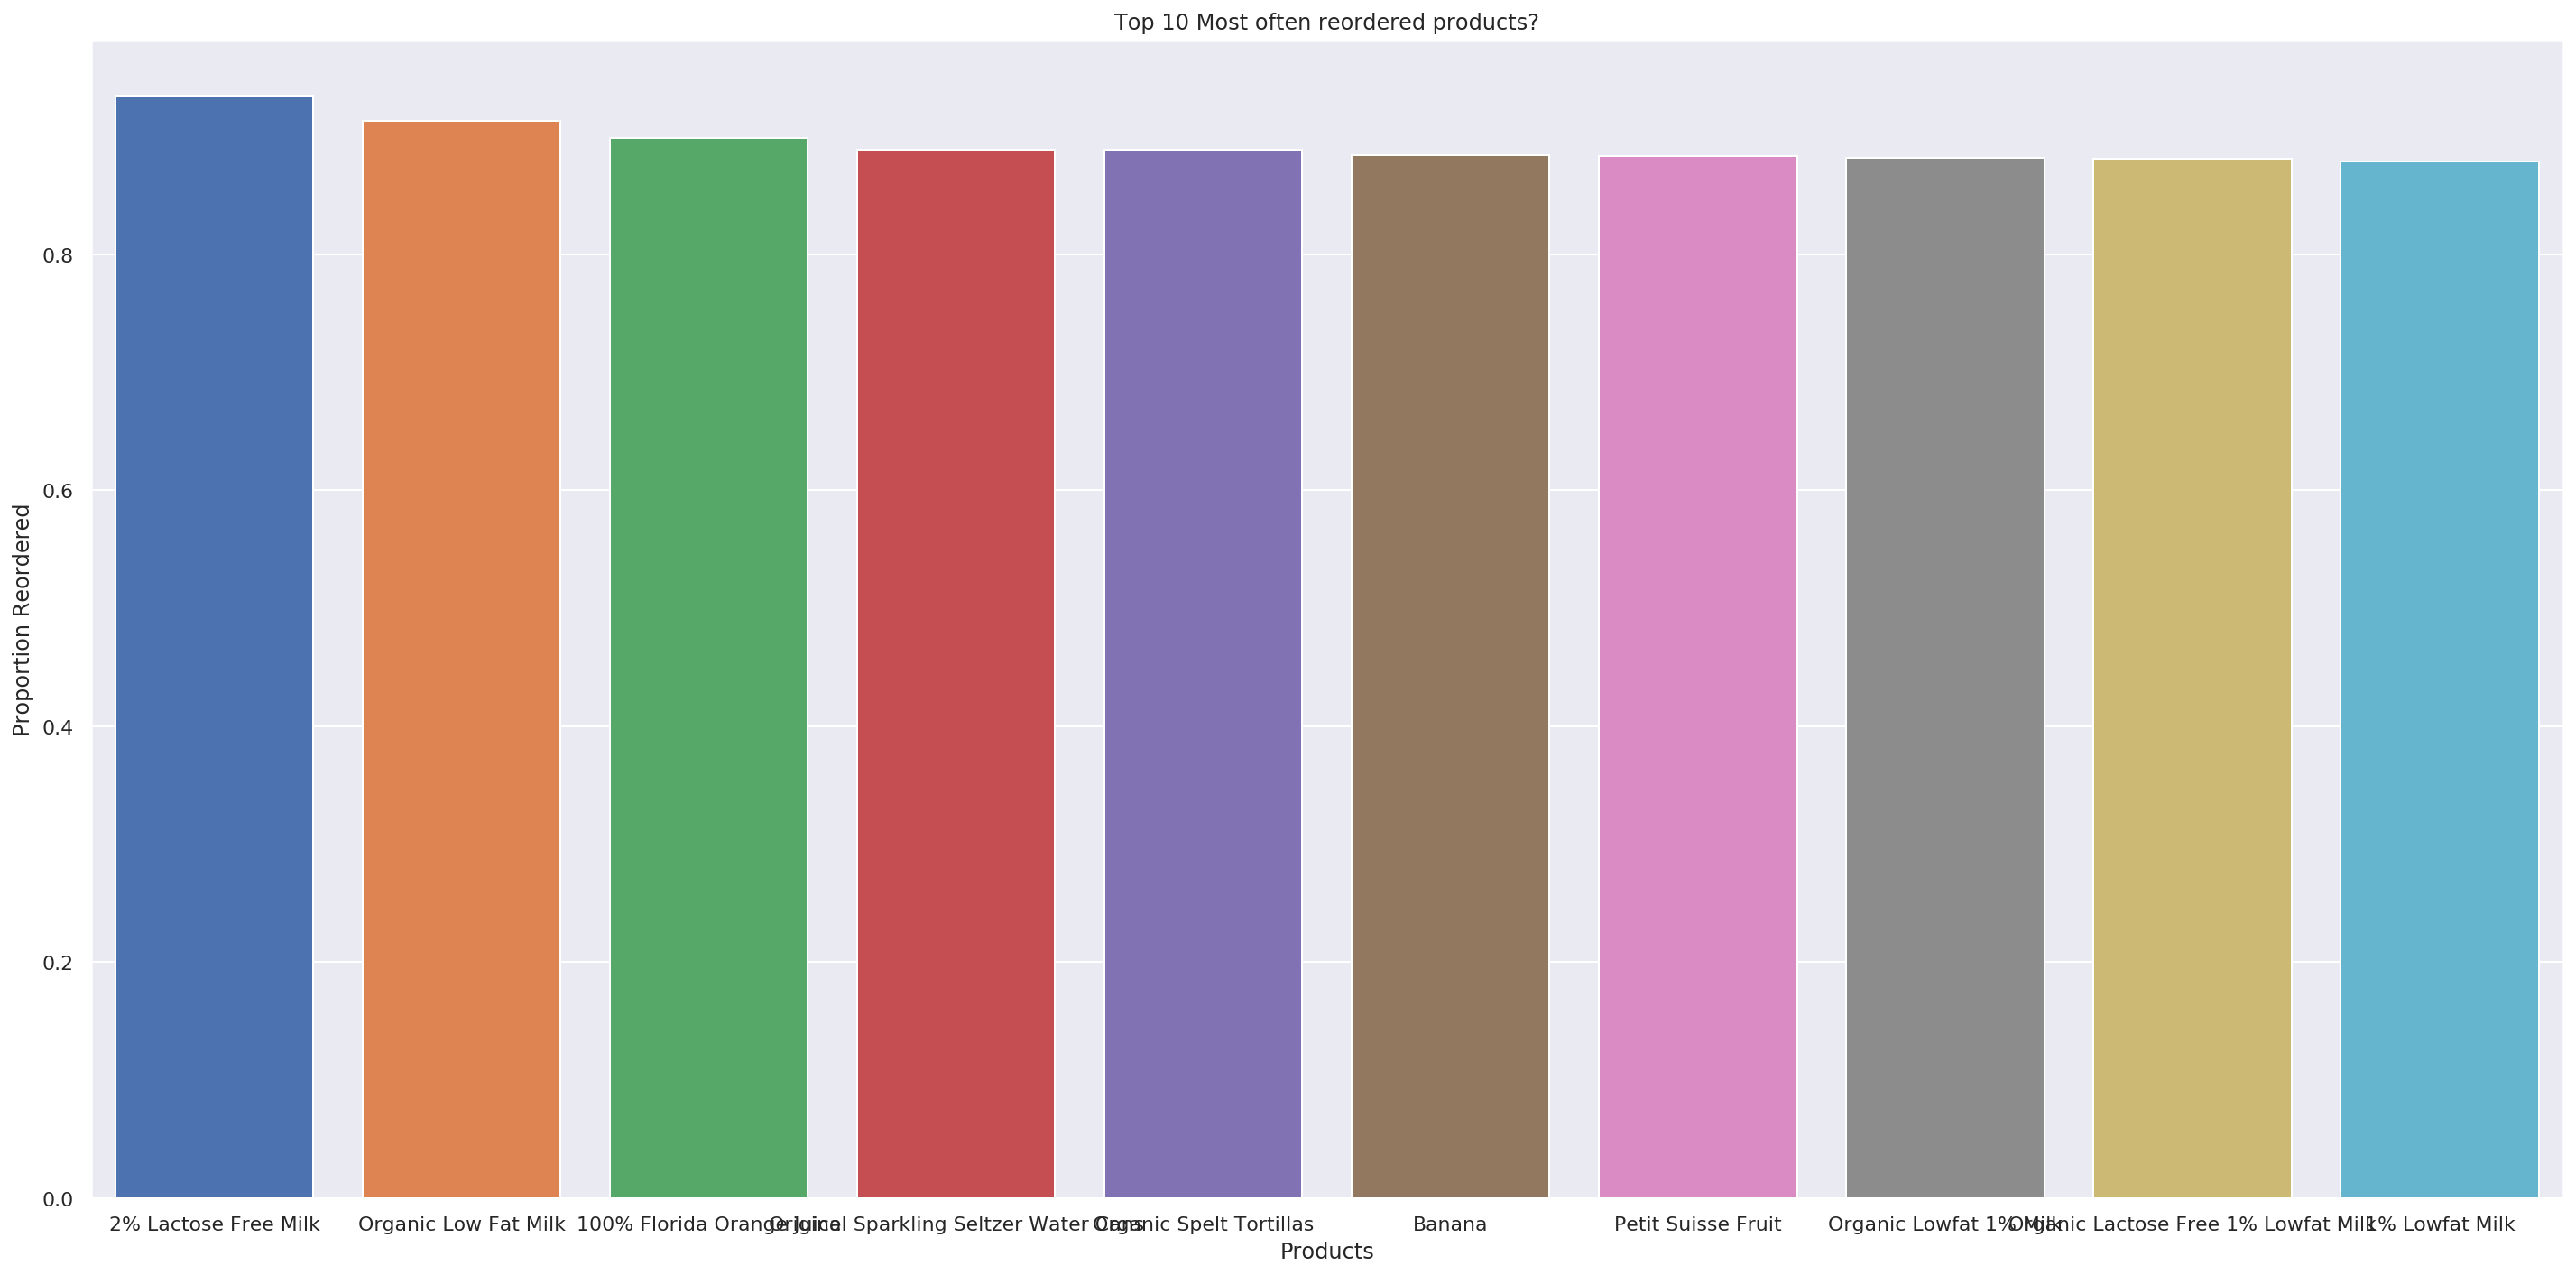

In [87]:
# Create plot
barplot = sns.barplot(y="proportion_reordered", x="product_name", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Top 10 Most often reordered products?")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Products")
plt.ylabel("Proportion Reordered")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## Which item do people put into the cart first?
People seem to be quite certain about Multifold Towels and if they buy them, put them into their cart first in 66% of the time.

In [110]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select f.product_id
, p.product_name 
, f.pct
, f.count
from (
        select *
        from (
                select t.* , count / cast(sum(count) over (partition by product_id)as double) as pct
                from (
                        SELECT product_id
                        , add_to_cart_order 
                        , count(*) as count
                        FROM {}.{} 
                        group by product_id
                        , add_to_cart_order
                        ) t
                ) a
        where count > 10
        and add_to_cart_order = 1
        order by pct DESC
        ) f
left join insta_db.products p
on f.product_id = p.product_id limit 10
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(25)

,product_id,product_name,pct,count
0,45004,White Multifold Towels,0.661017,39
1,11885,"""Sparkling Water",0.594203,41
2,13128,Purified Alkalkine Water with Minerals pH10,0.571429,12
3,4100,Organic Dark Roast,0.560000,14
4,1729,2% Lactose Free Milk,0.521739,48
5,6729,Cookie Tray,0.486111,35
6,9285,Boneless Pork Shoulder Butt,0.481481,13
7,12640,Sport Bottle with Flip Cap Natural Spring Water,0.461538,12
8,6848,Party Tumblers,0.461538,12
9,26405,XL Pick-A-Size Paper Towel Rolls,0.447619,47


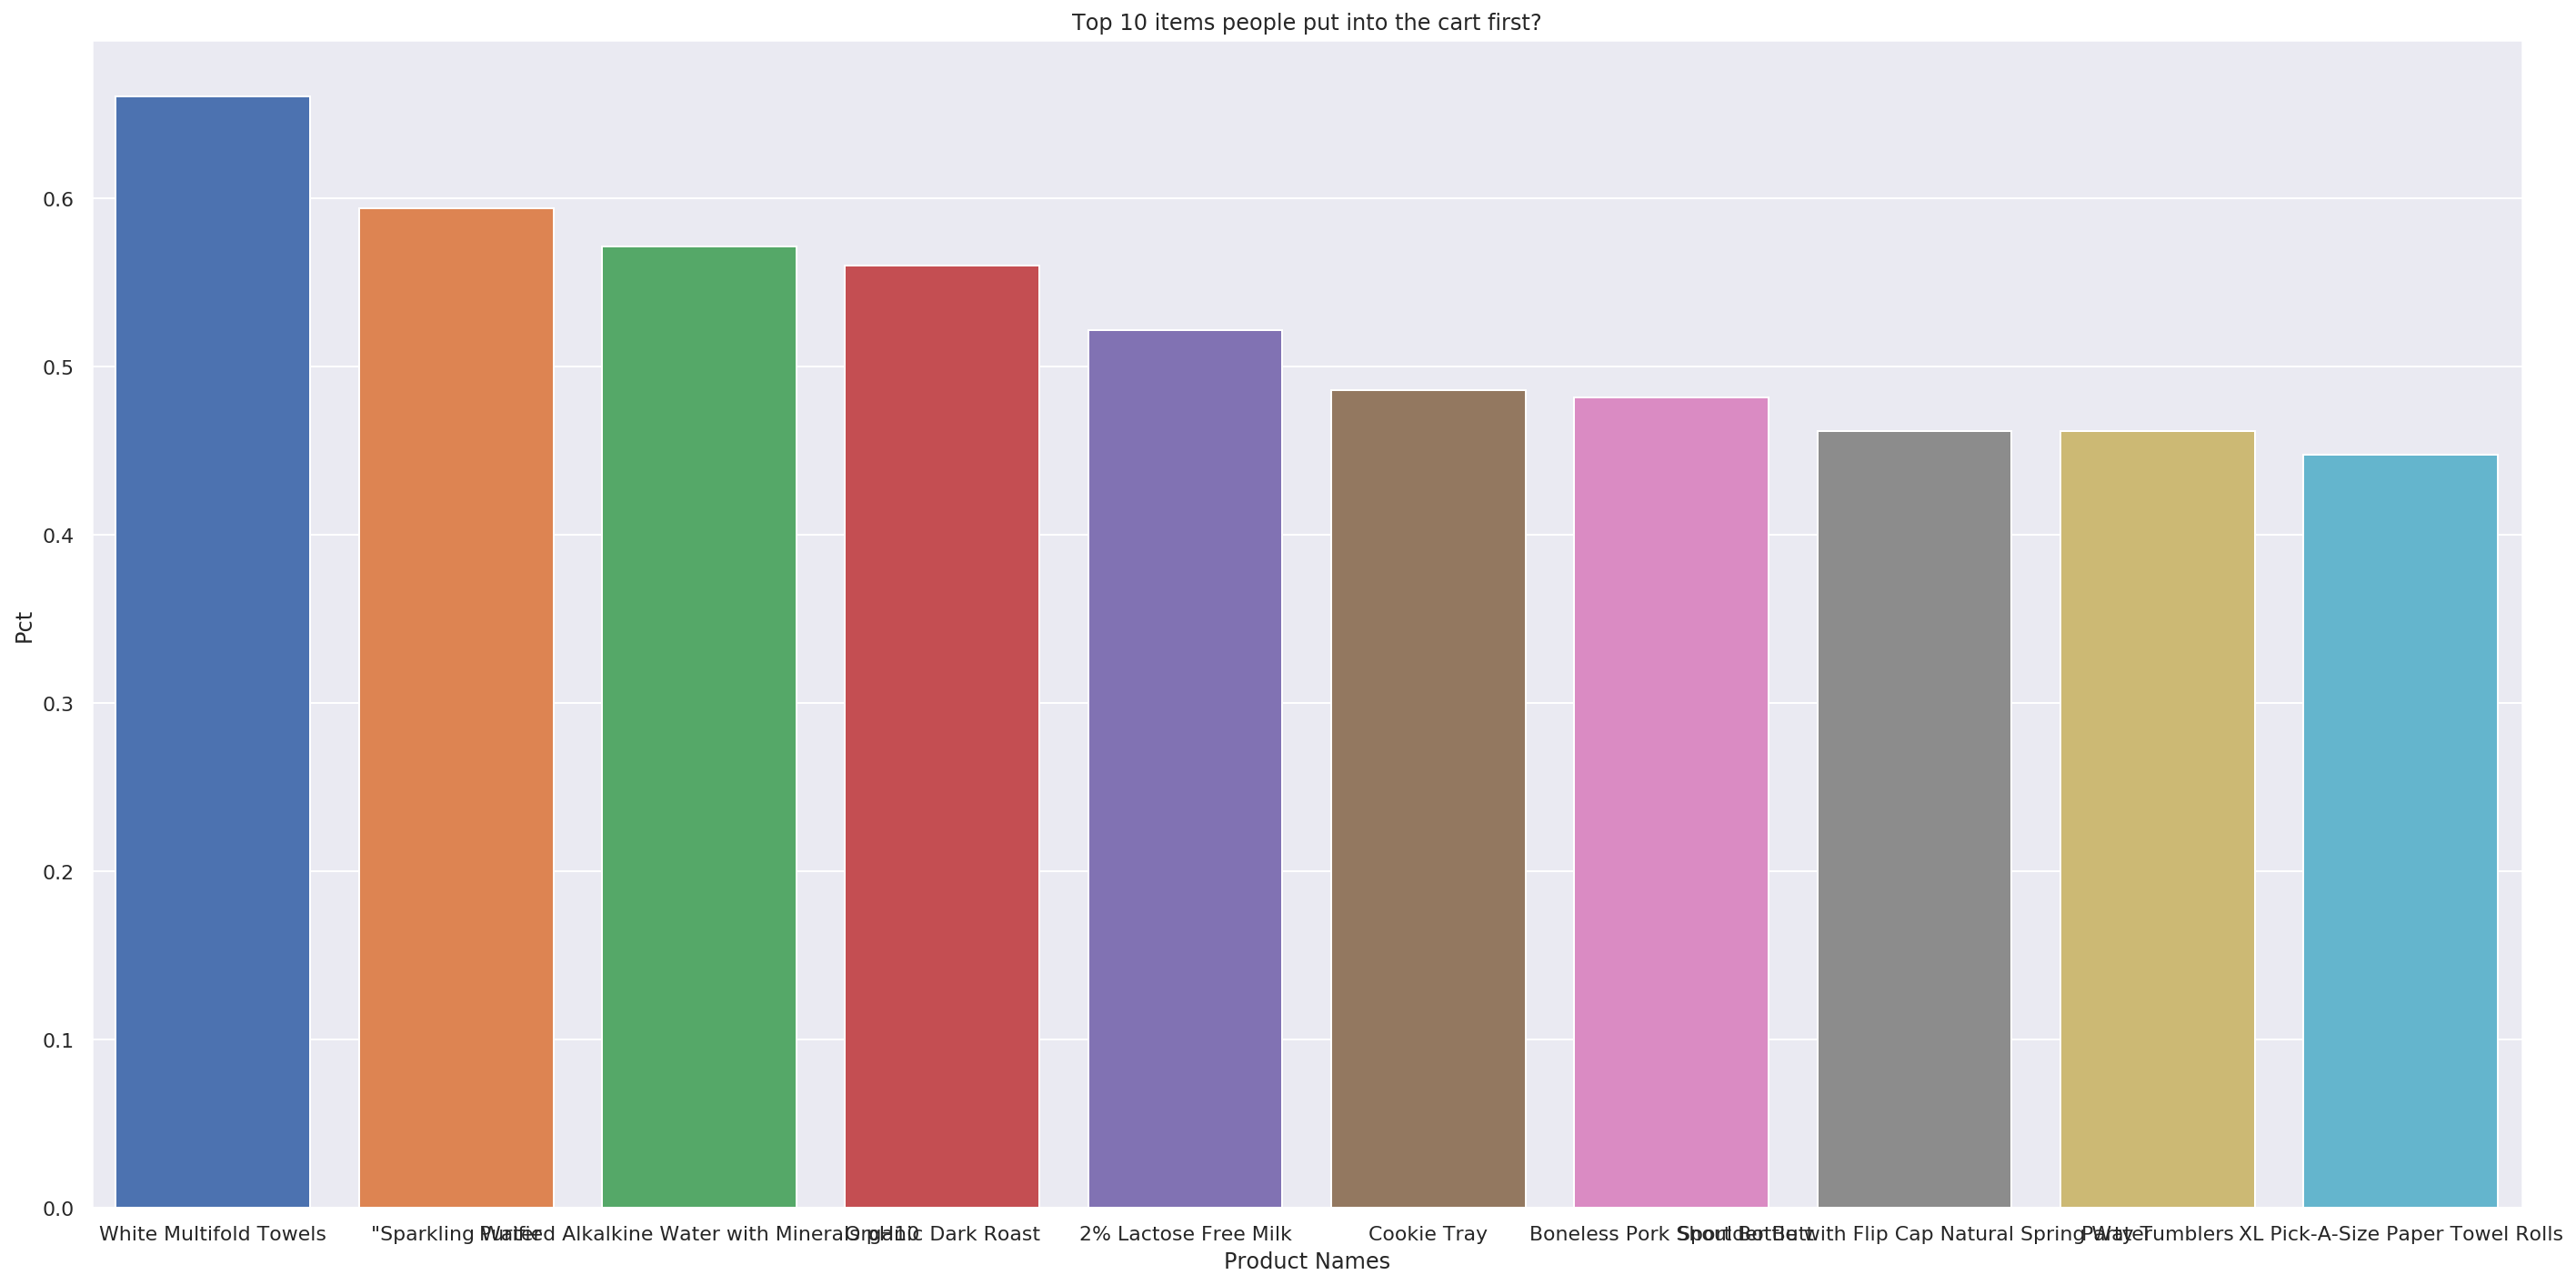

In [111]:
# Create plot
barplot = sns.barplot(y="pct", x="product_name", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Top 10 items people put into the cart first?")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Product Names")
plt.ylabel("Pct")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## Association between time of last order and probability of reorder
This is interesting: We can see that if people order again on the same day, they order the same product more often. Whereas when 30 days have passed, they tend to try out new things in their order.

In [114]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select days_since_prior_order
, avg(reordered) as mean_reorder 
FROM {}.{} t
left join insta_db.orders a
on t.order_id = a.order_id 
group by days_since_prior_order
order by days_since_prior_order ASC
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,days_since_prior_order,mean_reorder
0,0.0,0.824220
1,1.0,0.615261
2,2.0,0.619692
3,3.0,0.653187
4,4.0,0.675509


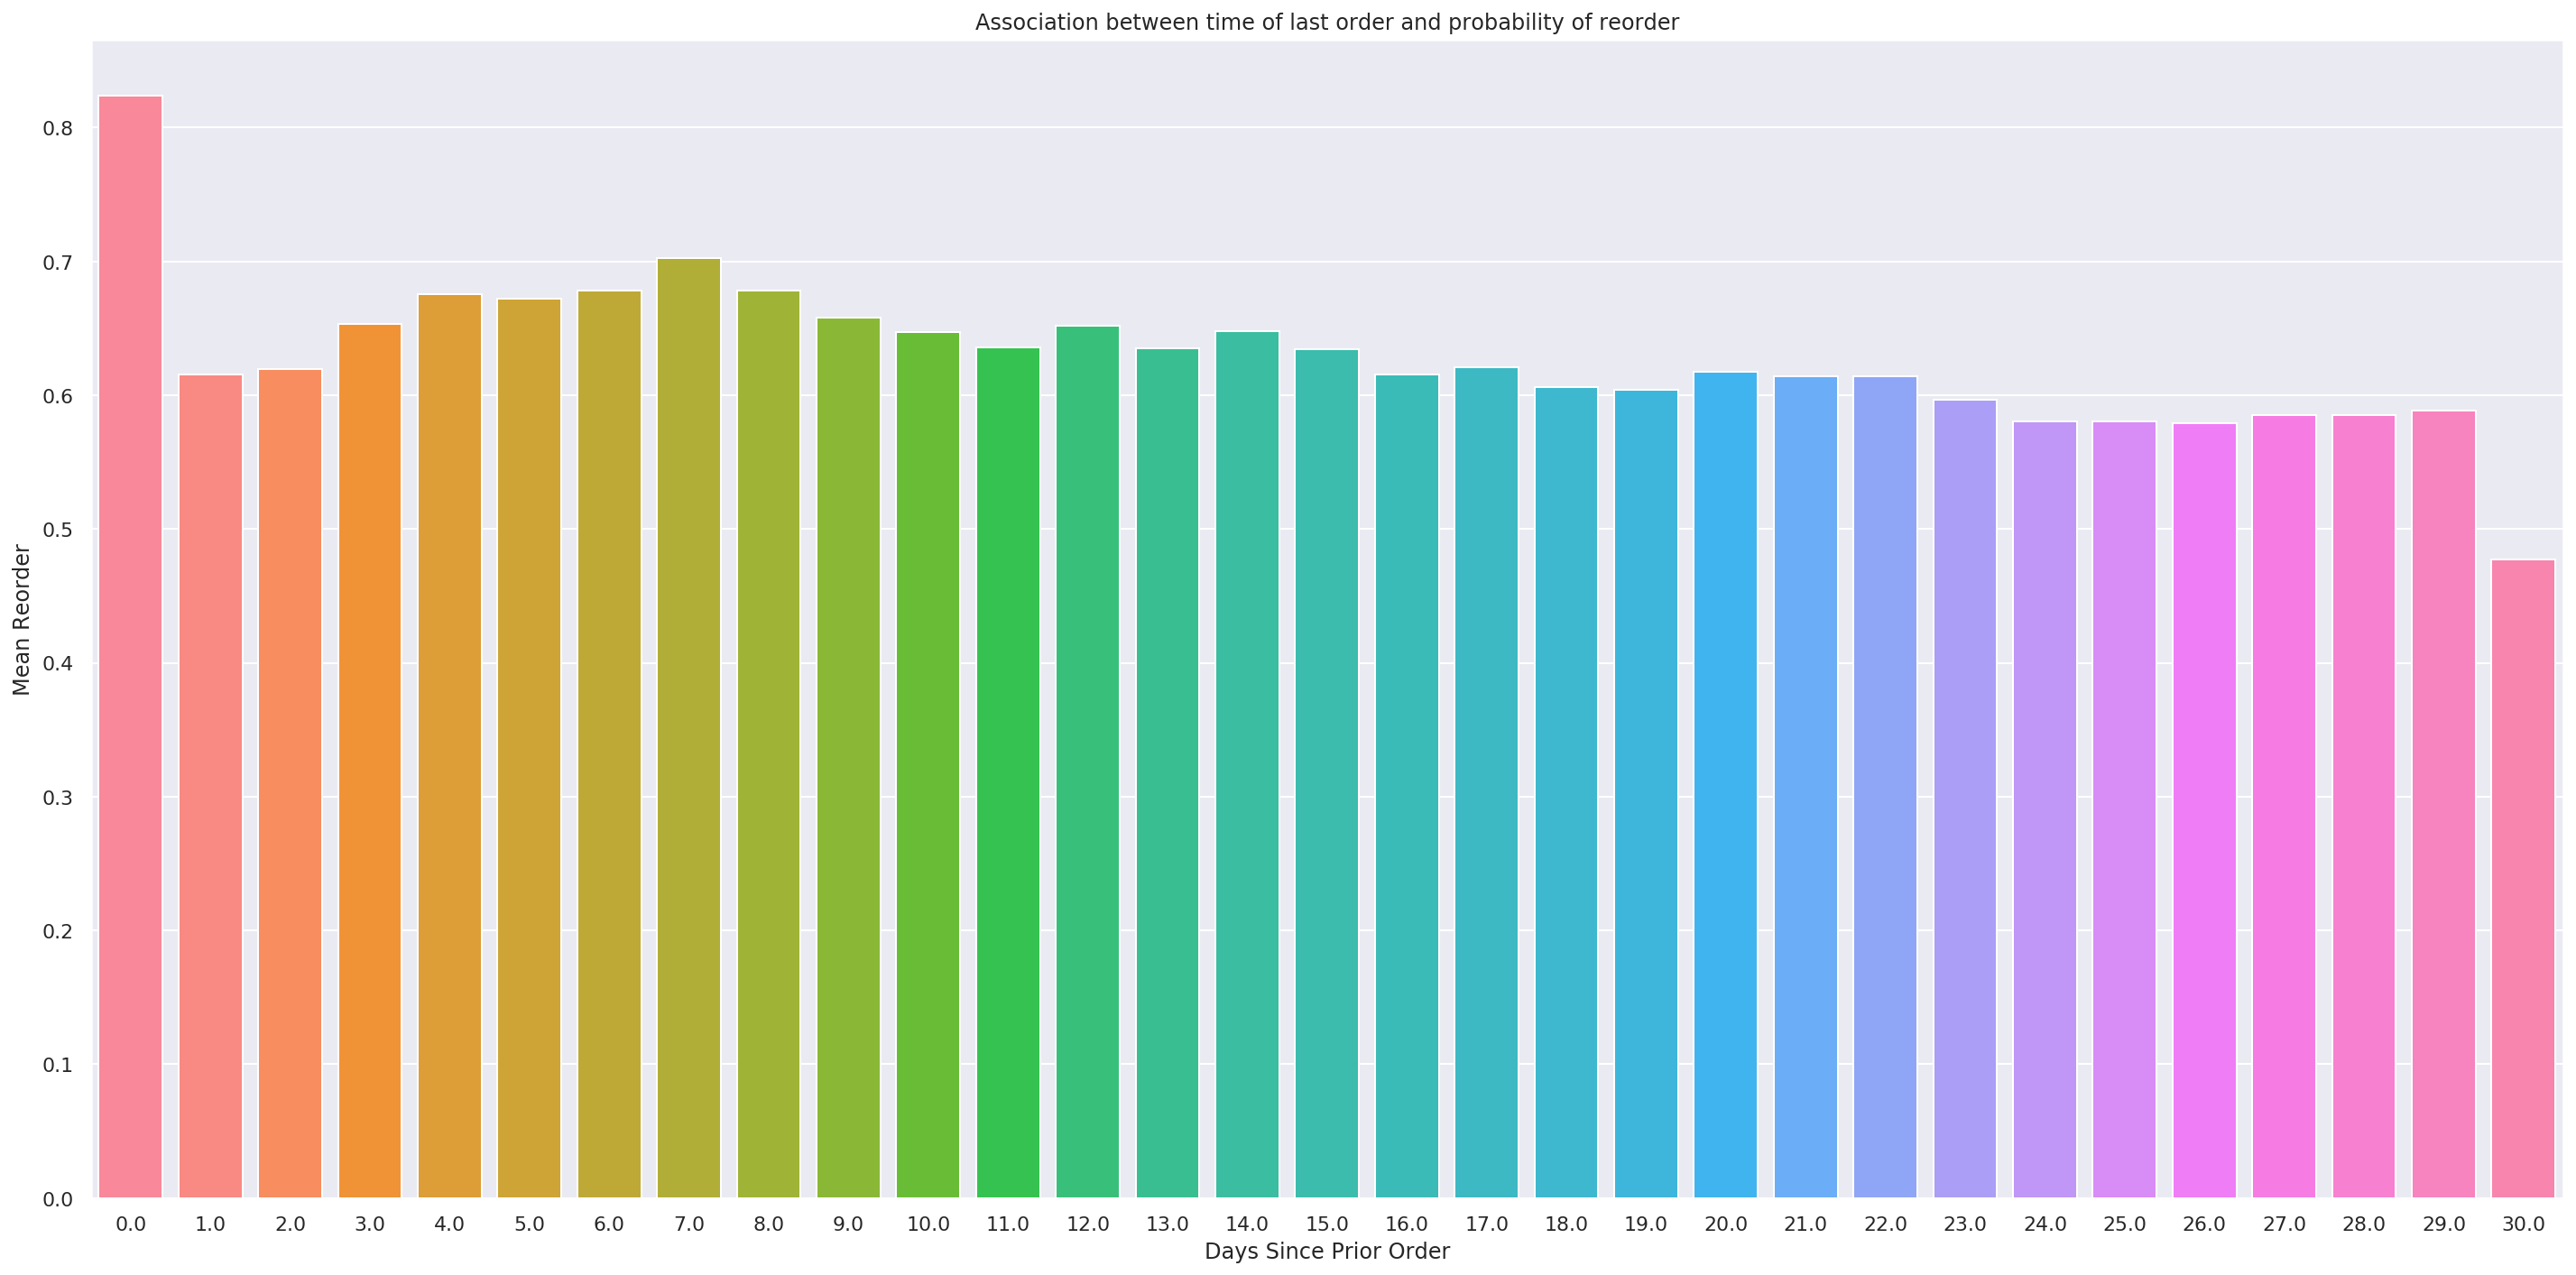

In [115]:
# Create plot
barplot = sns.barplot(y="mean_reorder", x="days_since_prior_order", data=df, saturation=1)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Association between time of last order and probability of reorder")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Days Since Prior Order")
plt.ylabel("Mean Reorder")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)

## Association between number of orders and probability of reordering
Products with a high number of orders are naturally more likely to be reordered. However, there seems to be a ceiling effect.

In [140]:
# Set Athena parameters
database_name = "insta_db"
table_name = "order_products__train"

# SQL statement
statement = """
select product_id
, avg(reordered) as proportion_reordered 
, cast(count(*) as double) as count
FROM {}.{} t
group by product_id
having avg(reordered) is not null
or count(*) is not null
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,product_id,proportion_reordered,count
0,39612,0.303030,33.0
1,48679,0.653816,2568.0
2,21616,0.708519,2923.0
3,20574,0.760736,326.0
4,8859,0.758947,950.0


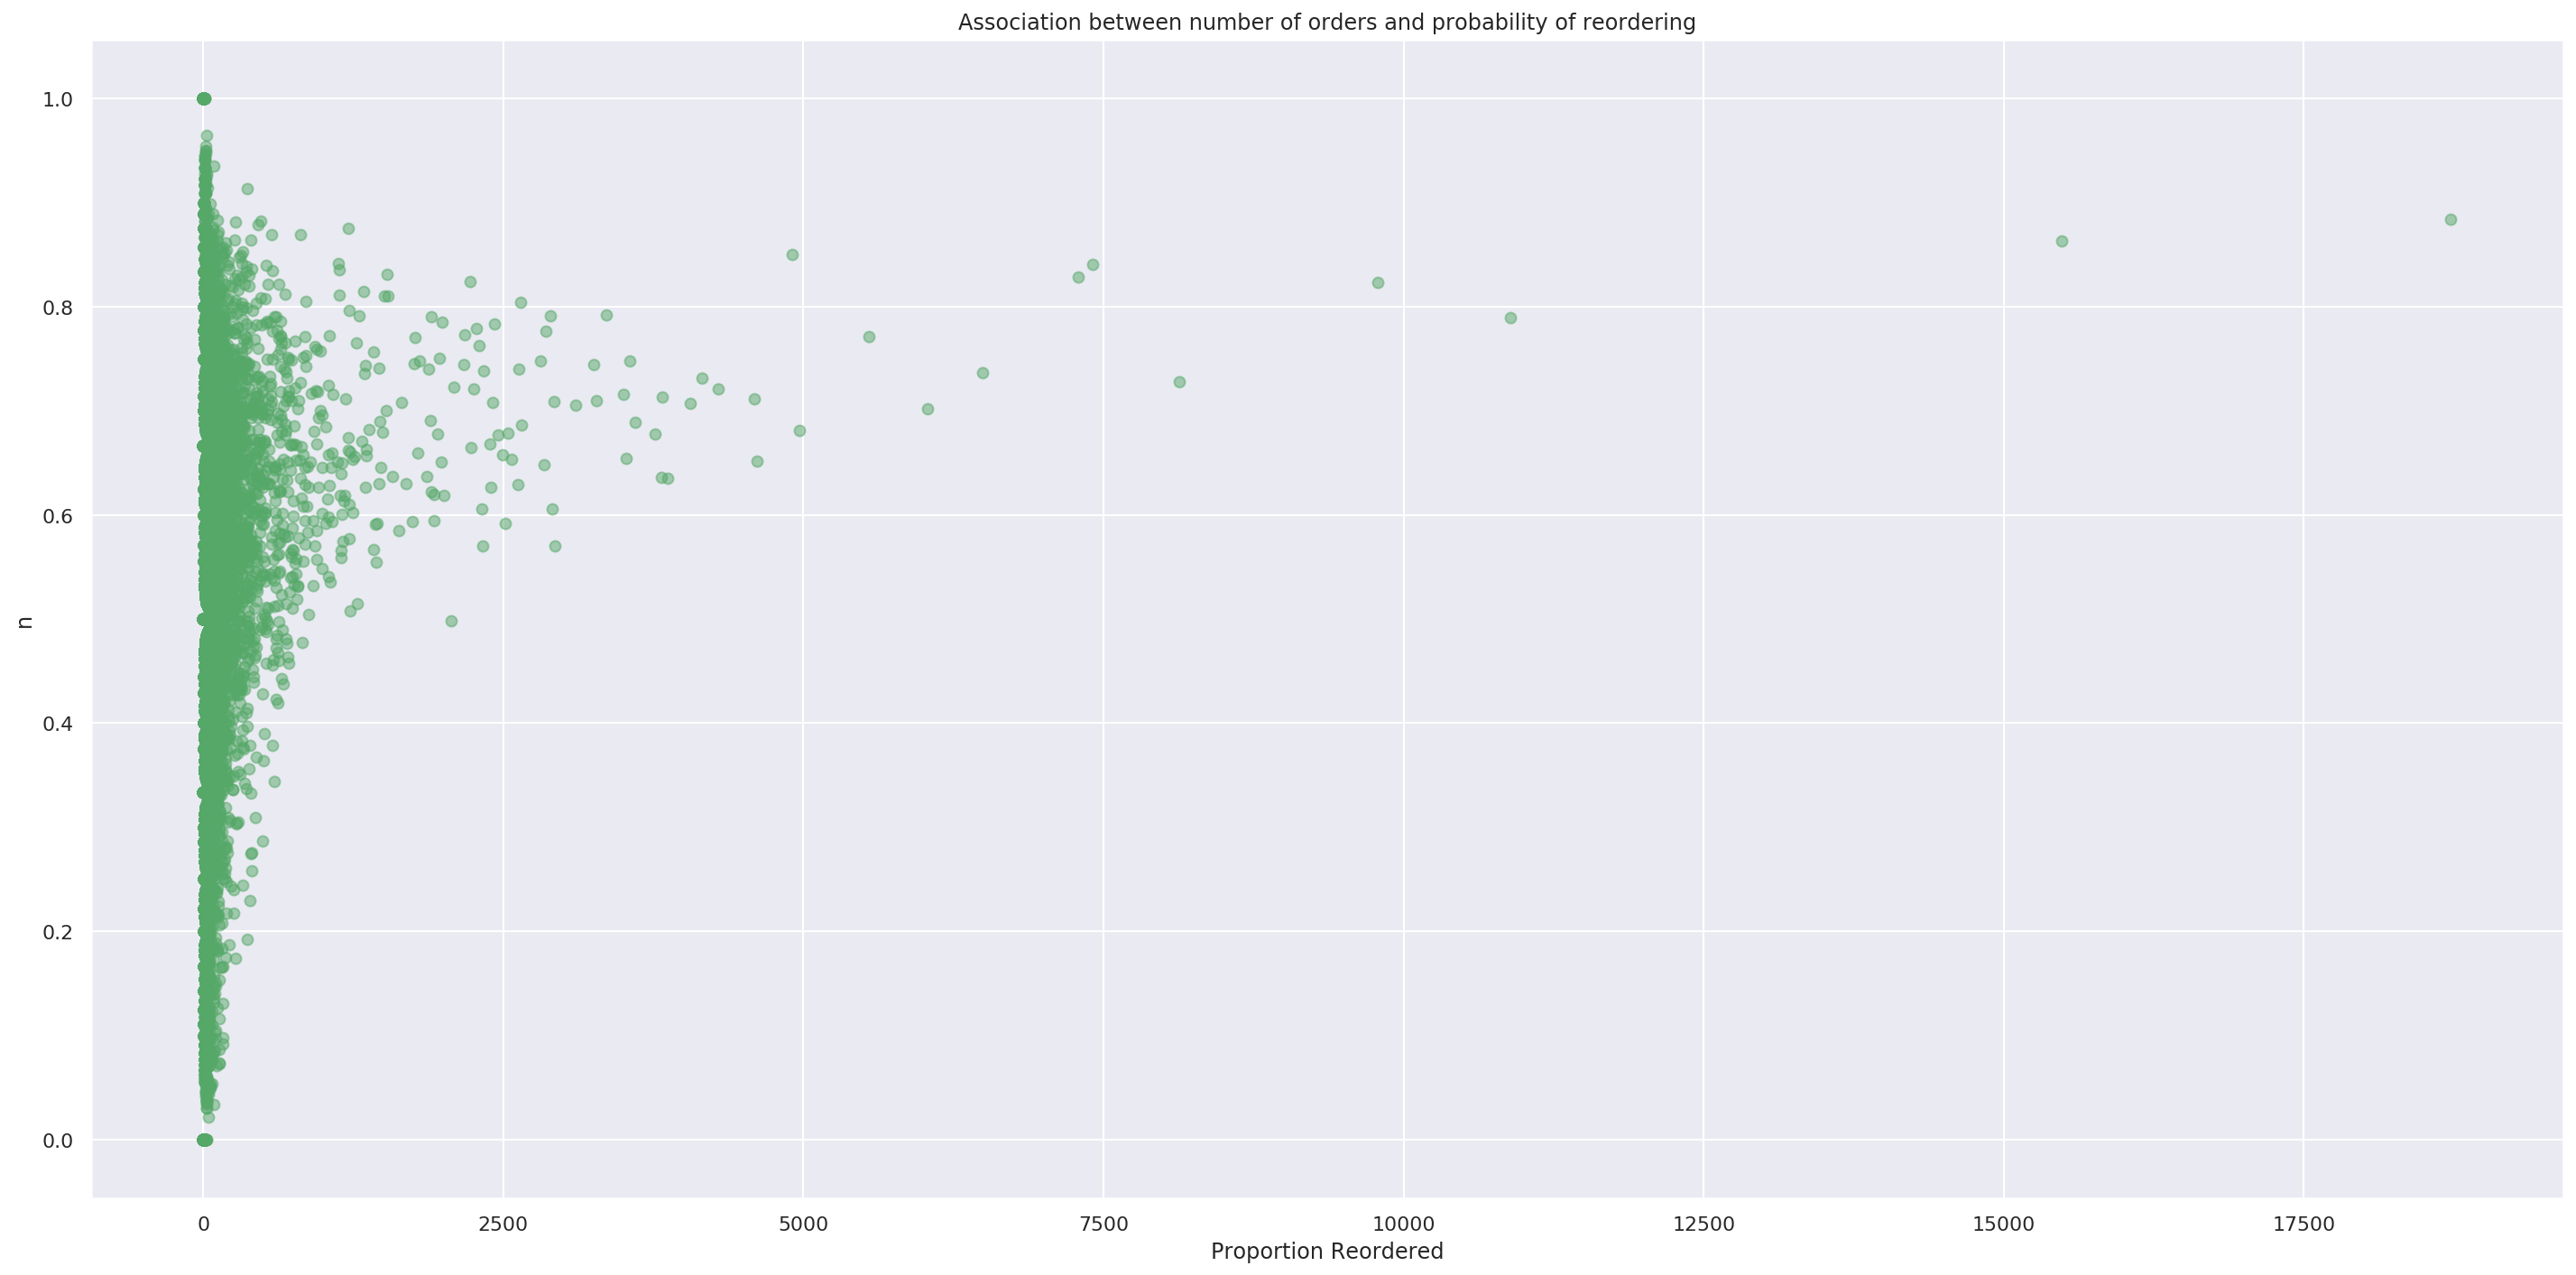

In [181]:
# Create plot
x = df[["count"]].to_numpy()
y = df[["proportion_reordered"]].to_numpy()
plt.scatter(x, y, c="g", alpha=0.5)

sns.set(rc={"figure.figsize": (20.0, 10.0)})

# Set title and x-axis ticks
plt.title("Association between number of orders and probability of reordering")
# plt.xticks([0, 1, 2, 3, 4, 5, 6], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])

plt.xlabel("Proportion Reordered")
plt.ylabel("n")

# Export plot if needed
plt.tight_layout()
# plt.savefig('avg_ratings_per_category.png', dpi=300)

# Show graphic
plt.show()

## Visualizing the Product Portfolio
Here is use to treemap package to visualize the structure of instacarts product portfolio. In total there are 21 departments containing 134 aisles.

In [205]:
# Set Athena parameters
database_name = "insta_db"
table_name = "products"

# SQL statement
statement = """
select d.department, a.aisle, p.count
from (
select department_id
, aisle_id
, count(*) as count
FROM {}.{} 
group by department_id
, aisle_id
) p
left join insta_db.departments d
on p.department_id = d.department_id
left join insta_db.aisles a
on p.aisle_id = a.aisle_id
where d.department is not null and a.aisle is not null
""".format(
    database_name, table_name
)

import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,department,aisle,count
0,beverages,tea,841
1,household,dish detergents,185
2,snacks,ice cream toppings,77
3,personal care,vitamins supplements,937
4,meat seafood,hot dogs bacon sausage,365


In [258]:
import plotly.express as px
import plotly

In [264]:
fig = px.treemap(df, 
                 path=[px.Constant("all"),'department', 'aisle'], 
                 values='count',
                 color='count'
                )
fig.show()

AttributeError: type object 'object' has no attribute 'dtype'

# Release Resources

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

## Check to see if resources are released.

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}